In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.decomposition import PCA

In [3]:
# Set data input folder
# Download files described in README.md to this folder
input_folder = "inputs"

# Set output folder, subfolder
output_folder = "outputs"
if not os.path.exists(output_folder):
    os.makedirs(output_folder, exist_ok=True)
if not os.path.exists(os.path.join(output_folder,"figure_panels")):
    os.makedirs(os.path.join(output_folder,"figure_panels"), exist_ok=True)

In [4]:
# Import the HeLa DMEM gene-level profiles
df_gene_DMEM = pd.read_csv("../Profile_Aggregation/outputs/20210422_6W_CP257_guide_normalized_feature_select_median_merged_ALLBATCHES___DMEM___ALLWELLS_gene_aggregated.csv.gz")
df_gene_DMEM = df_gene_DMEM.set_index('Metadata_Foci_Barcode_MatchedTo_GeneCode')

# Perform principle component analysis & select components representing 70% of the variation from the data set
pca = PCA(n_components=220)
df_gene_DMEM = pd.DataFrame(pca.fit_transform(df_gene_DMEM),index=df_gene_DMEM.index)
df_gene_DMEM = df_gene_DMEM.reset_index()
x = list(pca.explained_variance_ratio_)
y = [sum(x[:i+1]) for i in range(len(x))]
print('Explained variance ratio :', y[219])
df_gene_DMEM.head()

Explained variance ratio : 0.6972934792452036


Metadata_Foci_Barcode_MatchedTo_GeneCode         0         1         2  \
0                                     A1BG  2.092481  2.050896 -2.702913   
1                                     A1CF  0.915212  0.731267  0.308046   
2                                      A2M  1.411886  0.270059 -1.526264   
3                                    A2ML1 -1.032636  0.414364  1.106600   
4                                  A3GALT2 -9.132142  0.319693  0.956446   

          3         4         5         6         7         8  ...       210  \
0 -2.196188 -1.524967 -0.988298 -0.562997  1.488245  0.949721  ...  0.161941   
1  0.903943 -1.660998 -0.163355 -1.284553  1.240668  0.480527  ... -0.130676   
2 -1.226641 -1.605991  1.900452 -0.410489  1.357781  0.071125  ... -0.056331   
3  0.363595  0.747577  0.652518 -0.566605 -0.630537 -0.826418  ...  0.271087   
4 -0.407254  1.789846 -1.139985  1.412148 -1.044647 -2.287626  ...  0.215212   

        211       212       213       214       215       216       217  \
0 -0.099363  0.019781 -0.040908 -0.370930 -0.448964  0.463909  0.019441   
1 -0.283330 -0.029545 -0.233563 -0.192860  0.201535  0.034430 -0.034327   
2 -0.475769 -0.230415  0.328529  0.468788 -0.113115 -0.141109  0.476147   
3 -0.038322 -0.371468  0.025537  0.084709  0.140324  0.026056  0.223481   
4  0.357874  0.404352 -0.159643 -0.500395  0.023610  0.012438 -0.366118   

        218       219  
0 -0.588585 -0.210784  
1 -0.104752  0.001257  
2  0.078565  0.132730  
3 -0.038135  0.028397  
4 -0.115130 -0.466032  

[5 rows x 221 columns]

In [5]:
HeLa_HPLM_df = pd.read_csv(os.path.join('Profile_Aggregation','outputs','20210422_6W_CP257_guide_normalized_feature_select_median_merged_ALLBATCHES___HPLM___ALLWELLS_gene_aggregated.csv.gz'))
HeLa_HPLM_df = HeLa_HPLM_df.set_index('Metadata_Foci_Barcode_MatchedTo_GeneCode')
# Perform principle component analysis & select components representing 70% of the variation from the data set
pca_hplm = PCA(n_components=160)
HeLa_HPLM_df = pd.DataFrame(pca_hplm.fit_transform(HeLa_HPLM_df),index=HeLa_HPLM_df.index)
HeLa_HPLM_df = HeLa_HPLM_df.reset_index()
x = list(pca_hplm.explained_variance_ratio_)
y = [sum(x[:i+1]) for i in range(len(x))]
print('Explained variance ratio :', y[159])
HeLa_HPLM_df.head()

Metadata_Foci_Barcode_MatchedTo_GeneCode         0         1         2  \
0                                         A1BG  1.631312  1.613159  3.014042   
1                                         A1CF  2.979367  3.591269 -0.149918   
2                                          A2M  1.769034 -1.775785 -1.059892   
3                                        A2ML1 -0.131835 -1.229280  3.069760   
4                                      A3GALT2 -2.508585 -1.732827 -0.752530   
...                                        ...       ...       ...       ...   
20388                                   ZYG11B -3.072808 -0.710320  1.715157   
20389                                      ZYX  4.615455 -1.454654 -1.947446   
20390                                    ZZEF1  0.282210 -1.205877 -0.216085   
20391                                     ZZZ3 -5.779272  2.014191  1.894756   
20392                             nontargeting -0.448620  0.304656 -1.830499   

              3         4         5         6         7         8  ...  \
0     -1.749491  0.747655 -2.263314  1.621407  0.580308  0.266791  ...   
1     -1.388088  0.091967  0.088882 -0.042084  0.026289  0.206233  ...   
2     -4.576765 -0.036606  2.896833  1.086686 -0.909597 -1.201923  ...   
3      0.342828 -0.749012 -0.735887 -0.533491 -0.871848 -0.940486  ...   
4      0.367364 -3.609211  1.289250  1.666406  0.514052 -1.400885  ...   
...         ...       ...       ...       ...       ...       ...  ...   
20388  2.765976 -0.116362  1.786641 -0.820158  0.481661 -0.383478  ...   
20389  1.807662  0.263941  0.873602 -0.048001 -2.130388  0.345599  ...   
20390 -0.449842  0.759901  0.027792  0.541470 -2.138158  0.591552  ...   
20391 -3.167550  0.133769  1.853804  1.883916 -1.265890  1.750458  ...   
20392 -0.998293  0.038387 -0.508053  0.355738  0.065349 -0.250479  ...   

            150       151       152       153       154       155       156  \
0      0.213818  0.115624  0.721345 -0.309320  0.141114 -0.099636 -0.025547   
1      0.153536 -0.065603 -0.408114  0.078177  0.253341 -0.004272 -0.077323   
2      0.556979  0.051242  0.540404 -0.299752  0.090125  0.103976 -0.048682   
3     -0.142806 -0.228499  0.193865  0.414484 -0.249650  0.318131  0.079505   
4      0.119655 -0.162549 -0.108974 -0.564429 -0.035772 -0.126567 -0.063605   
...         ...       ...       ...       ...       ...       ...       ...   
20388  0.288162  0.181339 -0.132956  0.030066 -0.048871 -0.149678 -0.123979   
20389  0.276977  0.120904 -0.568032  0.040651  0.097662  0.106478 -0.162194   
20390 -0.050485  0.075721  0.376895  0.179647 -0.343328  0.102243 -0.425486   
20391 -0.165498 -0.039724 -0.135013  0.260263  0.552931 -0.005377 -0.673761   
20392 -0.013315 -0.009154 -0.007406  0.026269 -0.004454  0.038271 -0.002832   

            157       158       159  
0      0.008120 -0.055092 -0.265811  
1     -0.323089  0.077726 -0.066612  
2     -0.223261 -0.072866 -0.242828  
3     -0.233027 -0.377740 -0.136893  
4     -0.076482 -0.055381  0.041004  
...         ...       ...       ...  
20388 -0.041085 -0.166574 -0.074566  
20389  0.081799 -0.168409 -0.186112  
20390  0.009313  0.144018  0.356350  
20391 -0.061930  0.405977 -0.108133  
20392 -0.019516 -0.034011 -0.003005  

[20393 rows x 161 columns]

In [7]:
def coupled_heatmap(profile_df_1,profile_df_2,gene_set,genes,font_scale = 3.5):
    # Clustered based on the profile_df_1 arm first
    genes_lst = genes.split('\t')
    genes_df =  profile_df_1[profile_df_1['Metadata_Foci_Barcode_MatchedTo_GeneCode'].isin(genes_lst)]
    genes_profiles = genes_df.set_index('Metadata_Foci_Barcode_MatchedTo_GeneCode')
    
    # Clustered based on the profile_df_1 arm first
    data = genes_profiles.T
    corr = data.corr()

    ax = sns.clustermap(
        corr, 
        vmin=-1, vmax=1, center=0,
        method = 'ward',
        square=True,
    )

    # Clustered based on the profile_df_1 arm first
    profile_df_1_gene_list = list(genes_df.Metadata_Foci_Barcode_MatchedTo_GeneCode)

    profile_df_1_cluster_order = ax.dendrogram_row.reordered_ind
    profile_df_1_cluster_list = [profile_df_1_gene_list[i] for i in profile_df_1_cluster_order]

    profile_df_2_gene_df =  profile_df_2[profile_df_2['Metadata_Foci_Barcode_MatchedTo_GeneCode'].isin(profile_df_1_cluster_list)]
    profile_df_2_gene_profiles = profile_df_2_gene_df.set_index('Metadata_Foci_Barcode_MatchedTo_GeneCode')
    profile_df_2_gene_profiles = profile_df_2_gene_profiles.reindex(profile_df_1_cluster_list)
    profile_df_1_gene_profiles = genes_profiles.reindex(profile_df_1_cluster_list)

    profile_df_1_data = profile_df_1_gene_profiles.T
    profile_df_1_corr = profile_df_1_data.corr()

    profile_df_2_data = profile_df_2_gene_profiles.T
    profile_df_2_corr = profile_df_2_data.corr()
    len(profile_df_1_corr)
    corr = profile_df_2_corr.copy()
    for i in range(len(profile_df_1_corr)):
        for j in range(len(profile_df_1_corr)):
            if i > j:
                corr.iat[i,j] = profile_df_1_corr.iat[i,j]
            elif i < j:
                corr.iat[i,j] = profile_df_2_corr.iat[i,j]
            elif i == j:
                corr.iat[i,j] = 1
    
    output_file = f'HeLa_median_plate_level_profile_heatmap_clustering_gene_hits_{gene_set}.png'
    plt.clf()

    fig, ax = plt.subplots(figsize=(30, 30))
    sns.set(font_scale=font_scale,rc={'figure.figsize':(30,30)})

    ax = sns.heatmap(
                corr, 
                vmin=-1, vmax=1, center=0,
                cmap=sns.diverging_palette(250, 10 ,s=100,l=35, n=100),
                linewidth = 1,
                linecolor='white',
                square=True,
                cbar=False,
                cbar_kws={"shrink": .76}
    )
    ax.set_xticklabels(
                ax.get_xticklabels(),
                rotation=90,
                horizontalalignment='right'
    )
    ax.yaxis.tick_right()
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='left')

    plt.tight_layout()
    plt.show()
    fig.savefig(os.path.join(output_folder,output_file),dpi=300)


<Figure size 1000x1000 with 0 Axes>

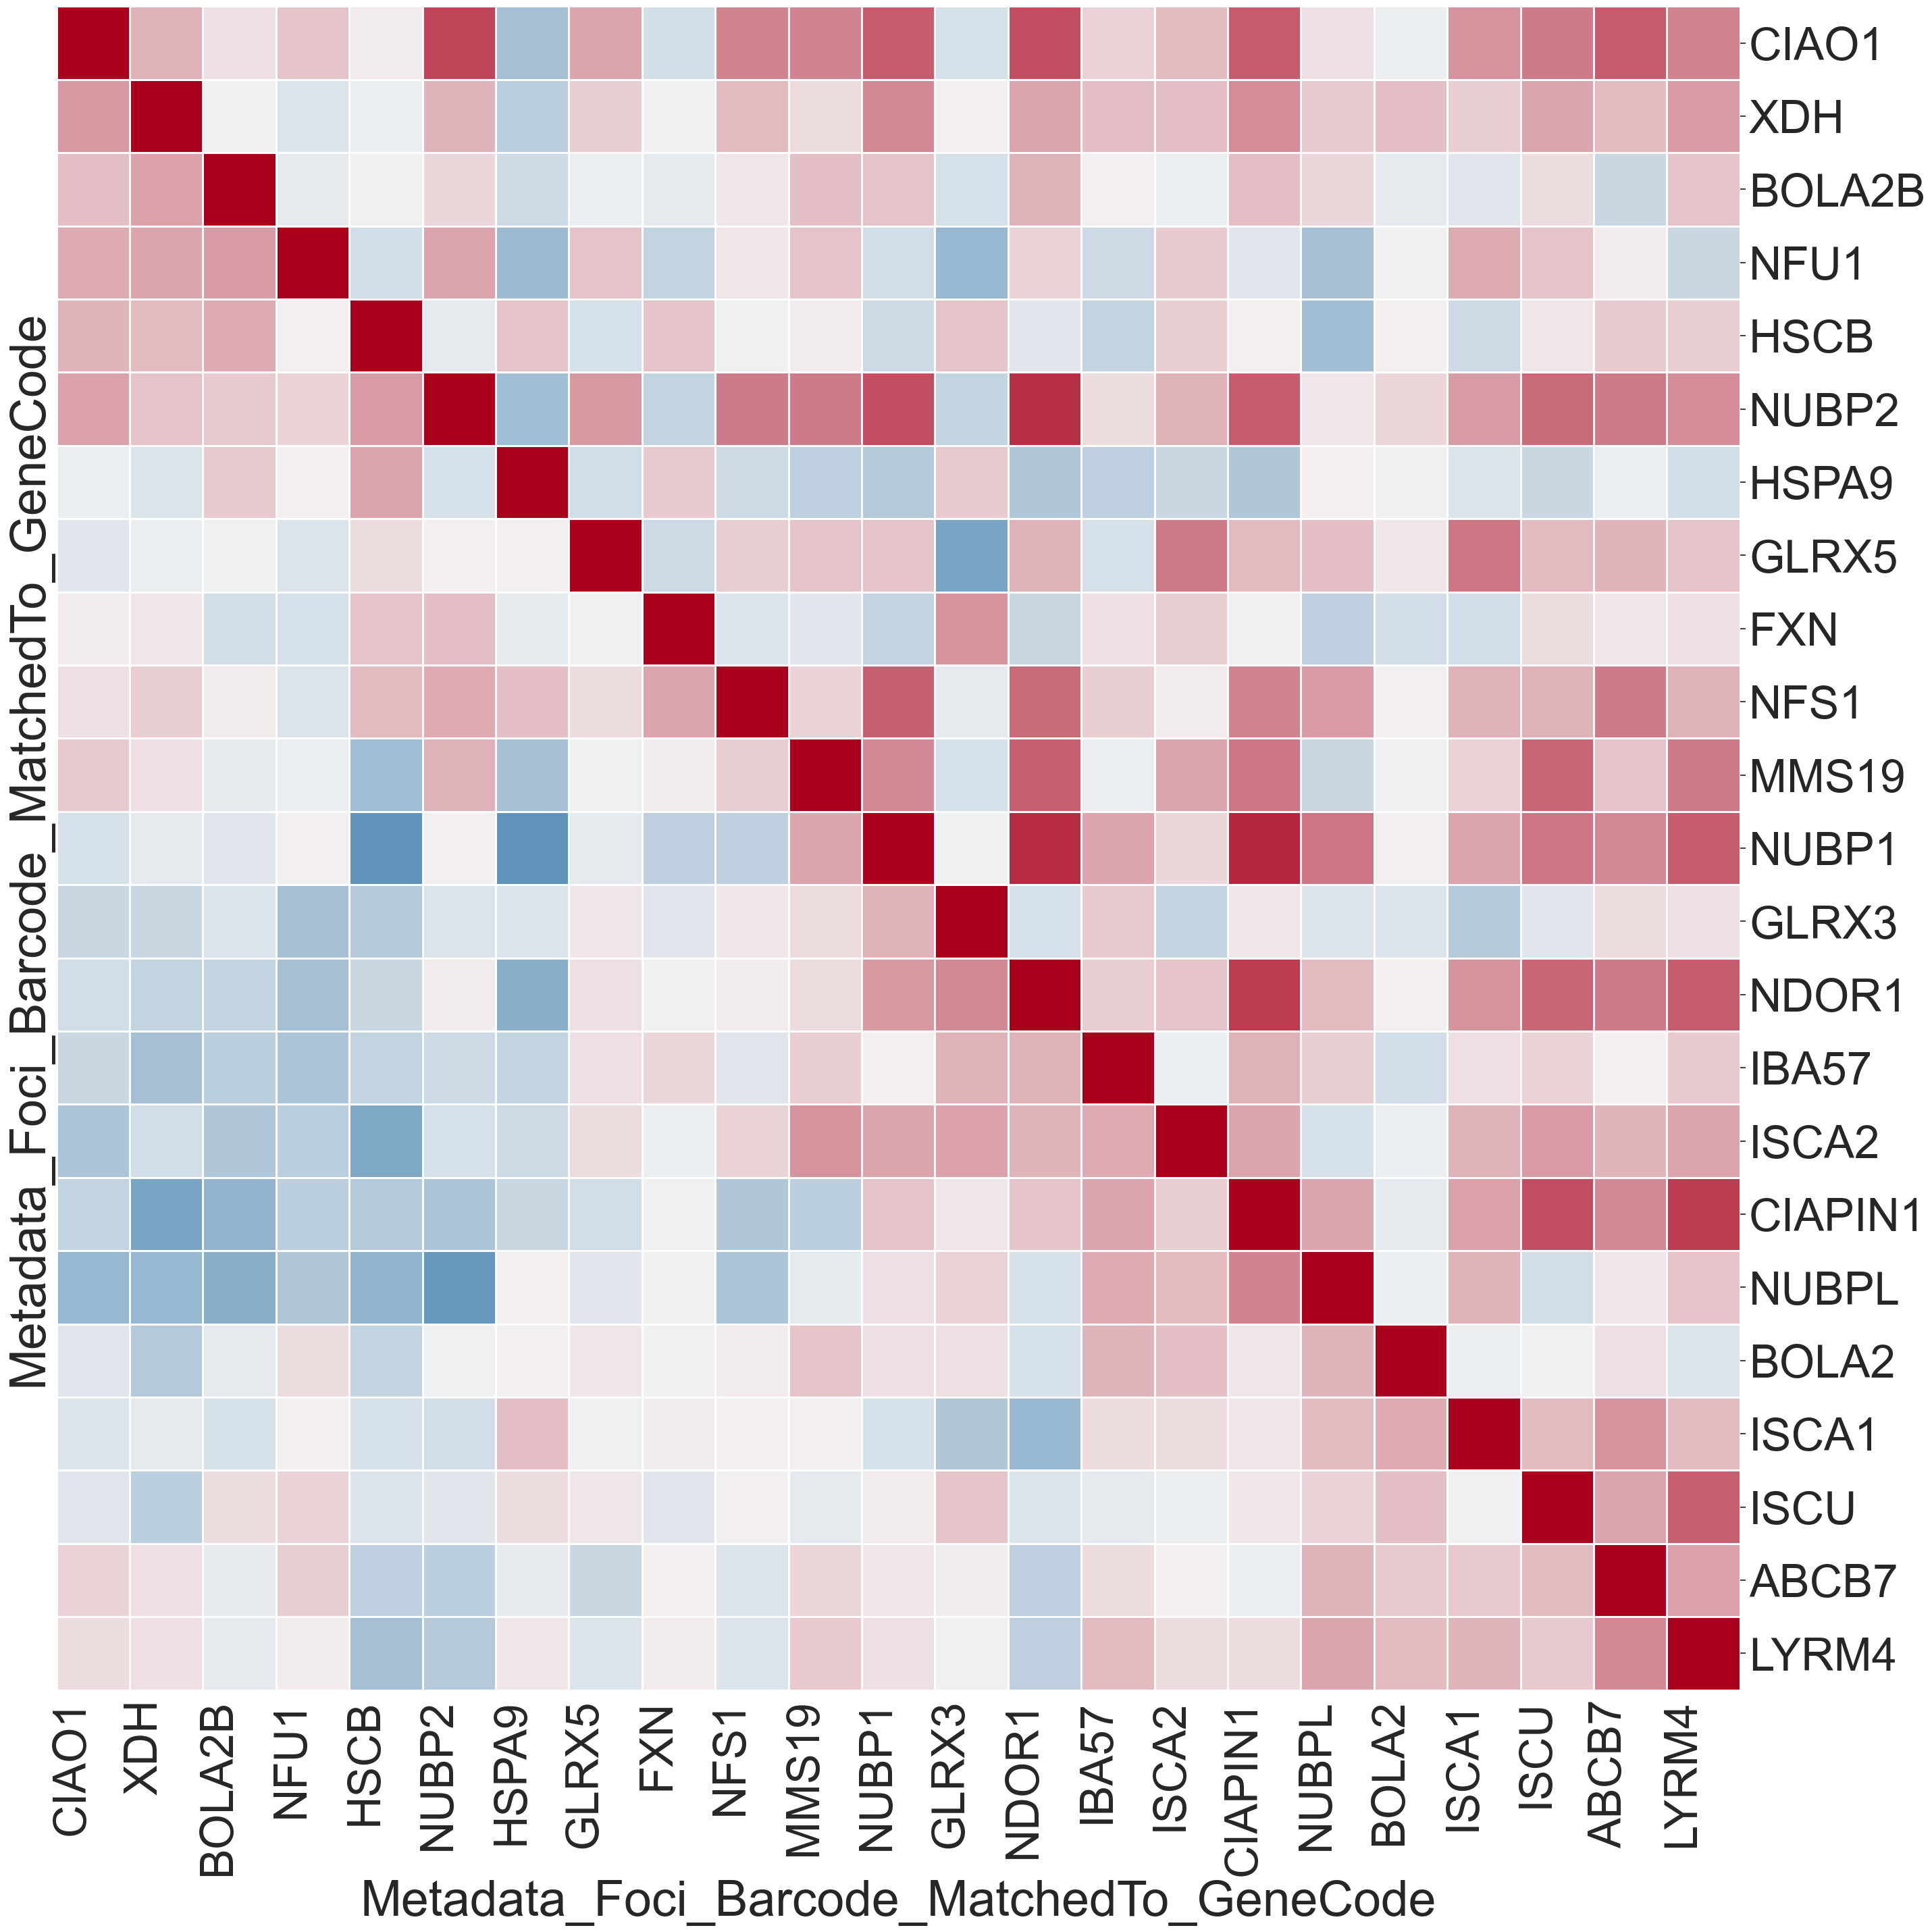

In [10]:
# Clustered based on the HPLM arm first
gene_set = 'GOBP_IRON_SULFUR_CLUSTER_ASSEMBLY_HPLM_cluster'
genes = 'NUBP2	GLRX3	ISCA2	HSCB	IBA57	ABCB7	ISCU	FXN	NDOR1	NFU1	HSPA9	NUBP1	GLRX5	CIAO2B	BOLA2	CIAPIN1	LYRM4	MMS19	CIAO3	BOLA2B	XDH	NUBPL	ISCA1	CIAO2A	NFS1	CIAO1'
coupled_heatmap(HeLa_HPLM_df,df_gene_DMEM,gene_set,genes,4.4)

<Figure size 1000x1000 with 0 Axes>

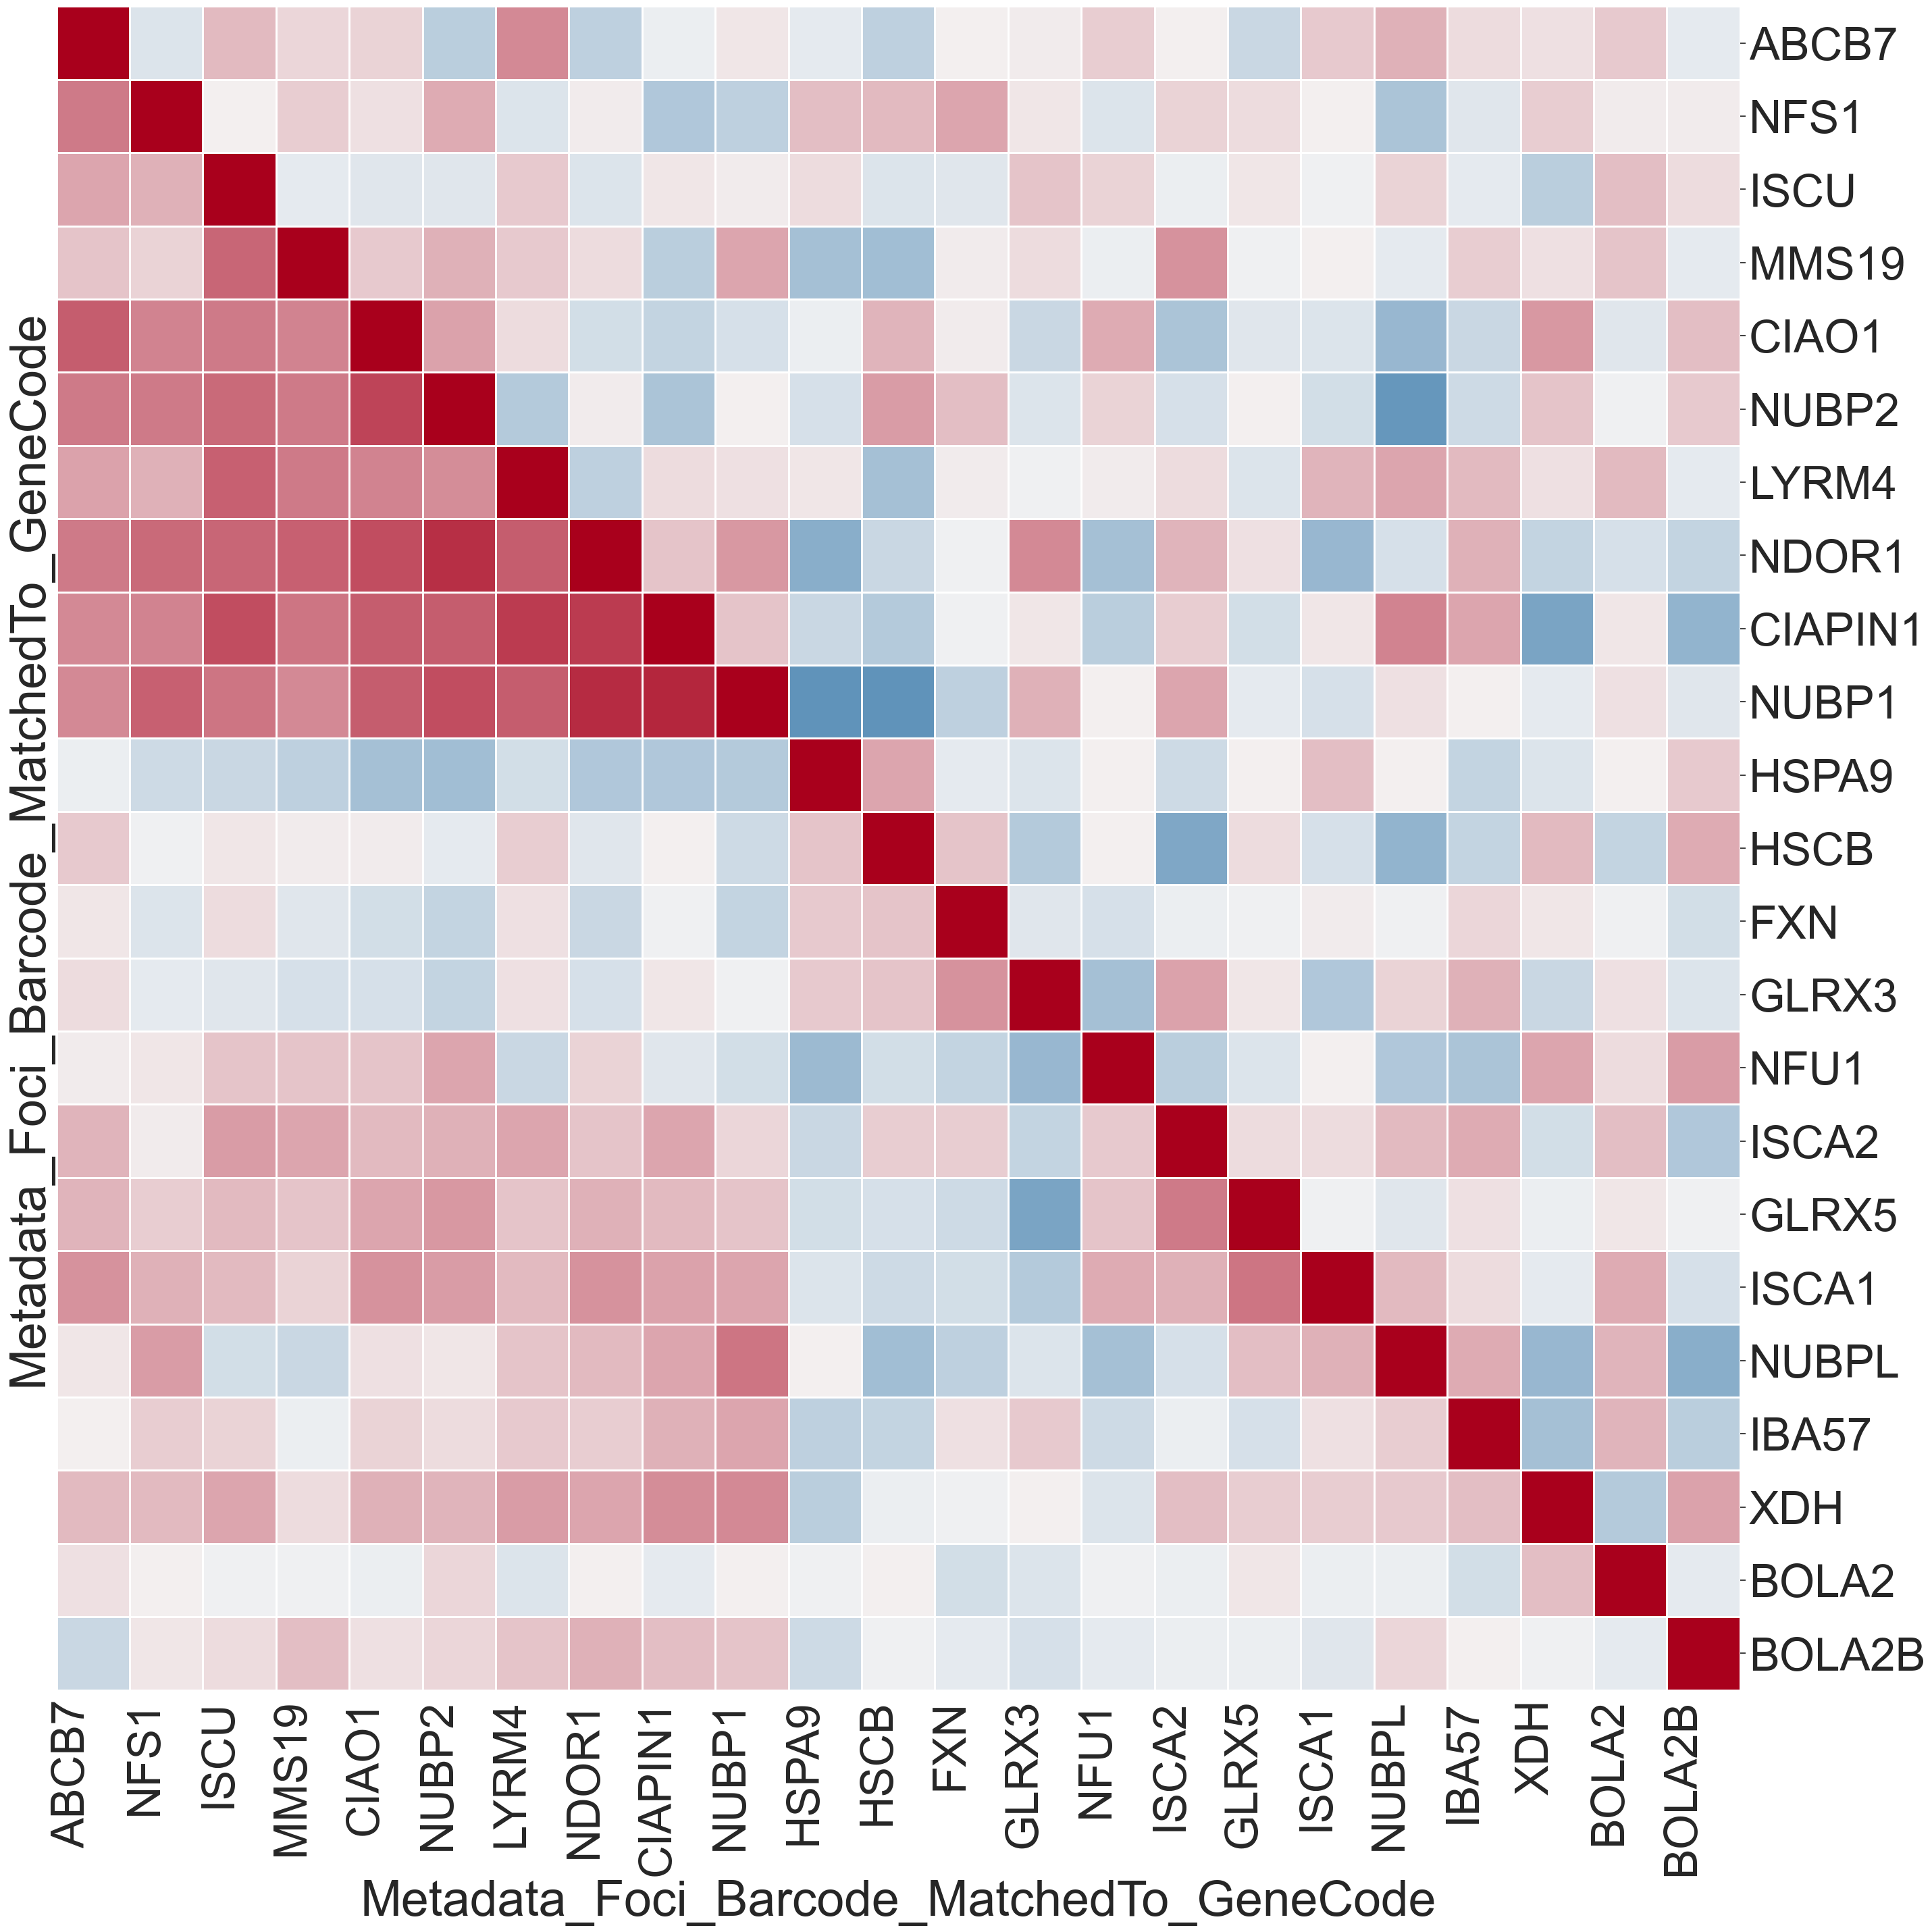

In [9]:
# Clustered based on the DMEM arm first
gene_set = 'GOBP_IRON_SULFUR_CLUSTER_ASSEMBLY_DMEM_cluster'
genes = 'NUBP2	GLRX3	ISCA2	HSCB	IBA57	ABCB7	ISCU	FXN	NDOR1	NFU1	HSPA9	NUBP1	GLRX5	CIAO2B	BOLA2	CIAPIN1	LYRM4	MMS19	CIAO3	BOLA2B	XDH	NUBPL	ISCA1	CIAO2A	NFS1	CIAO1'
coupled_heatmap(df_gene_DMEM,HeLa_HPLM_df,gene_set,genes,4.4)

<Figure size 1000x1000 with 0 Axes>

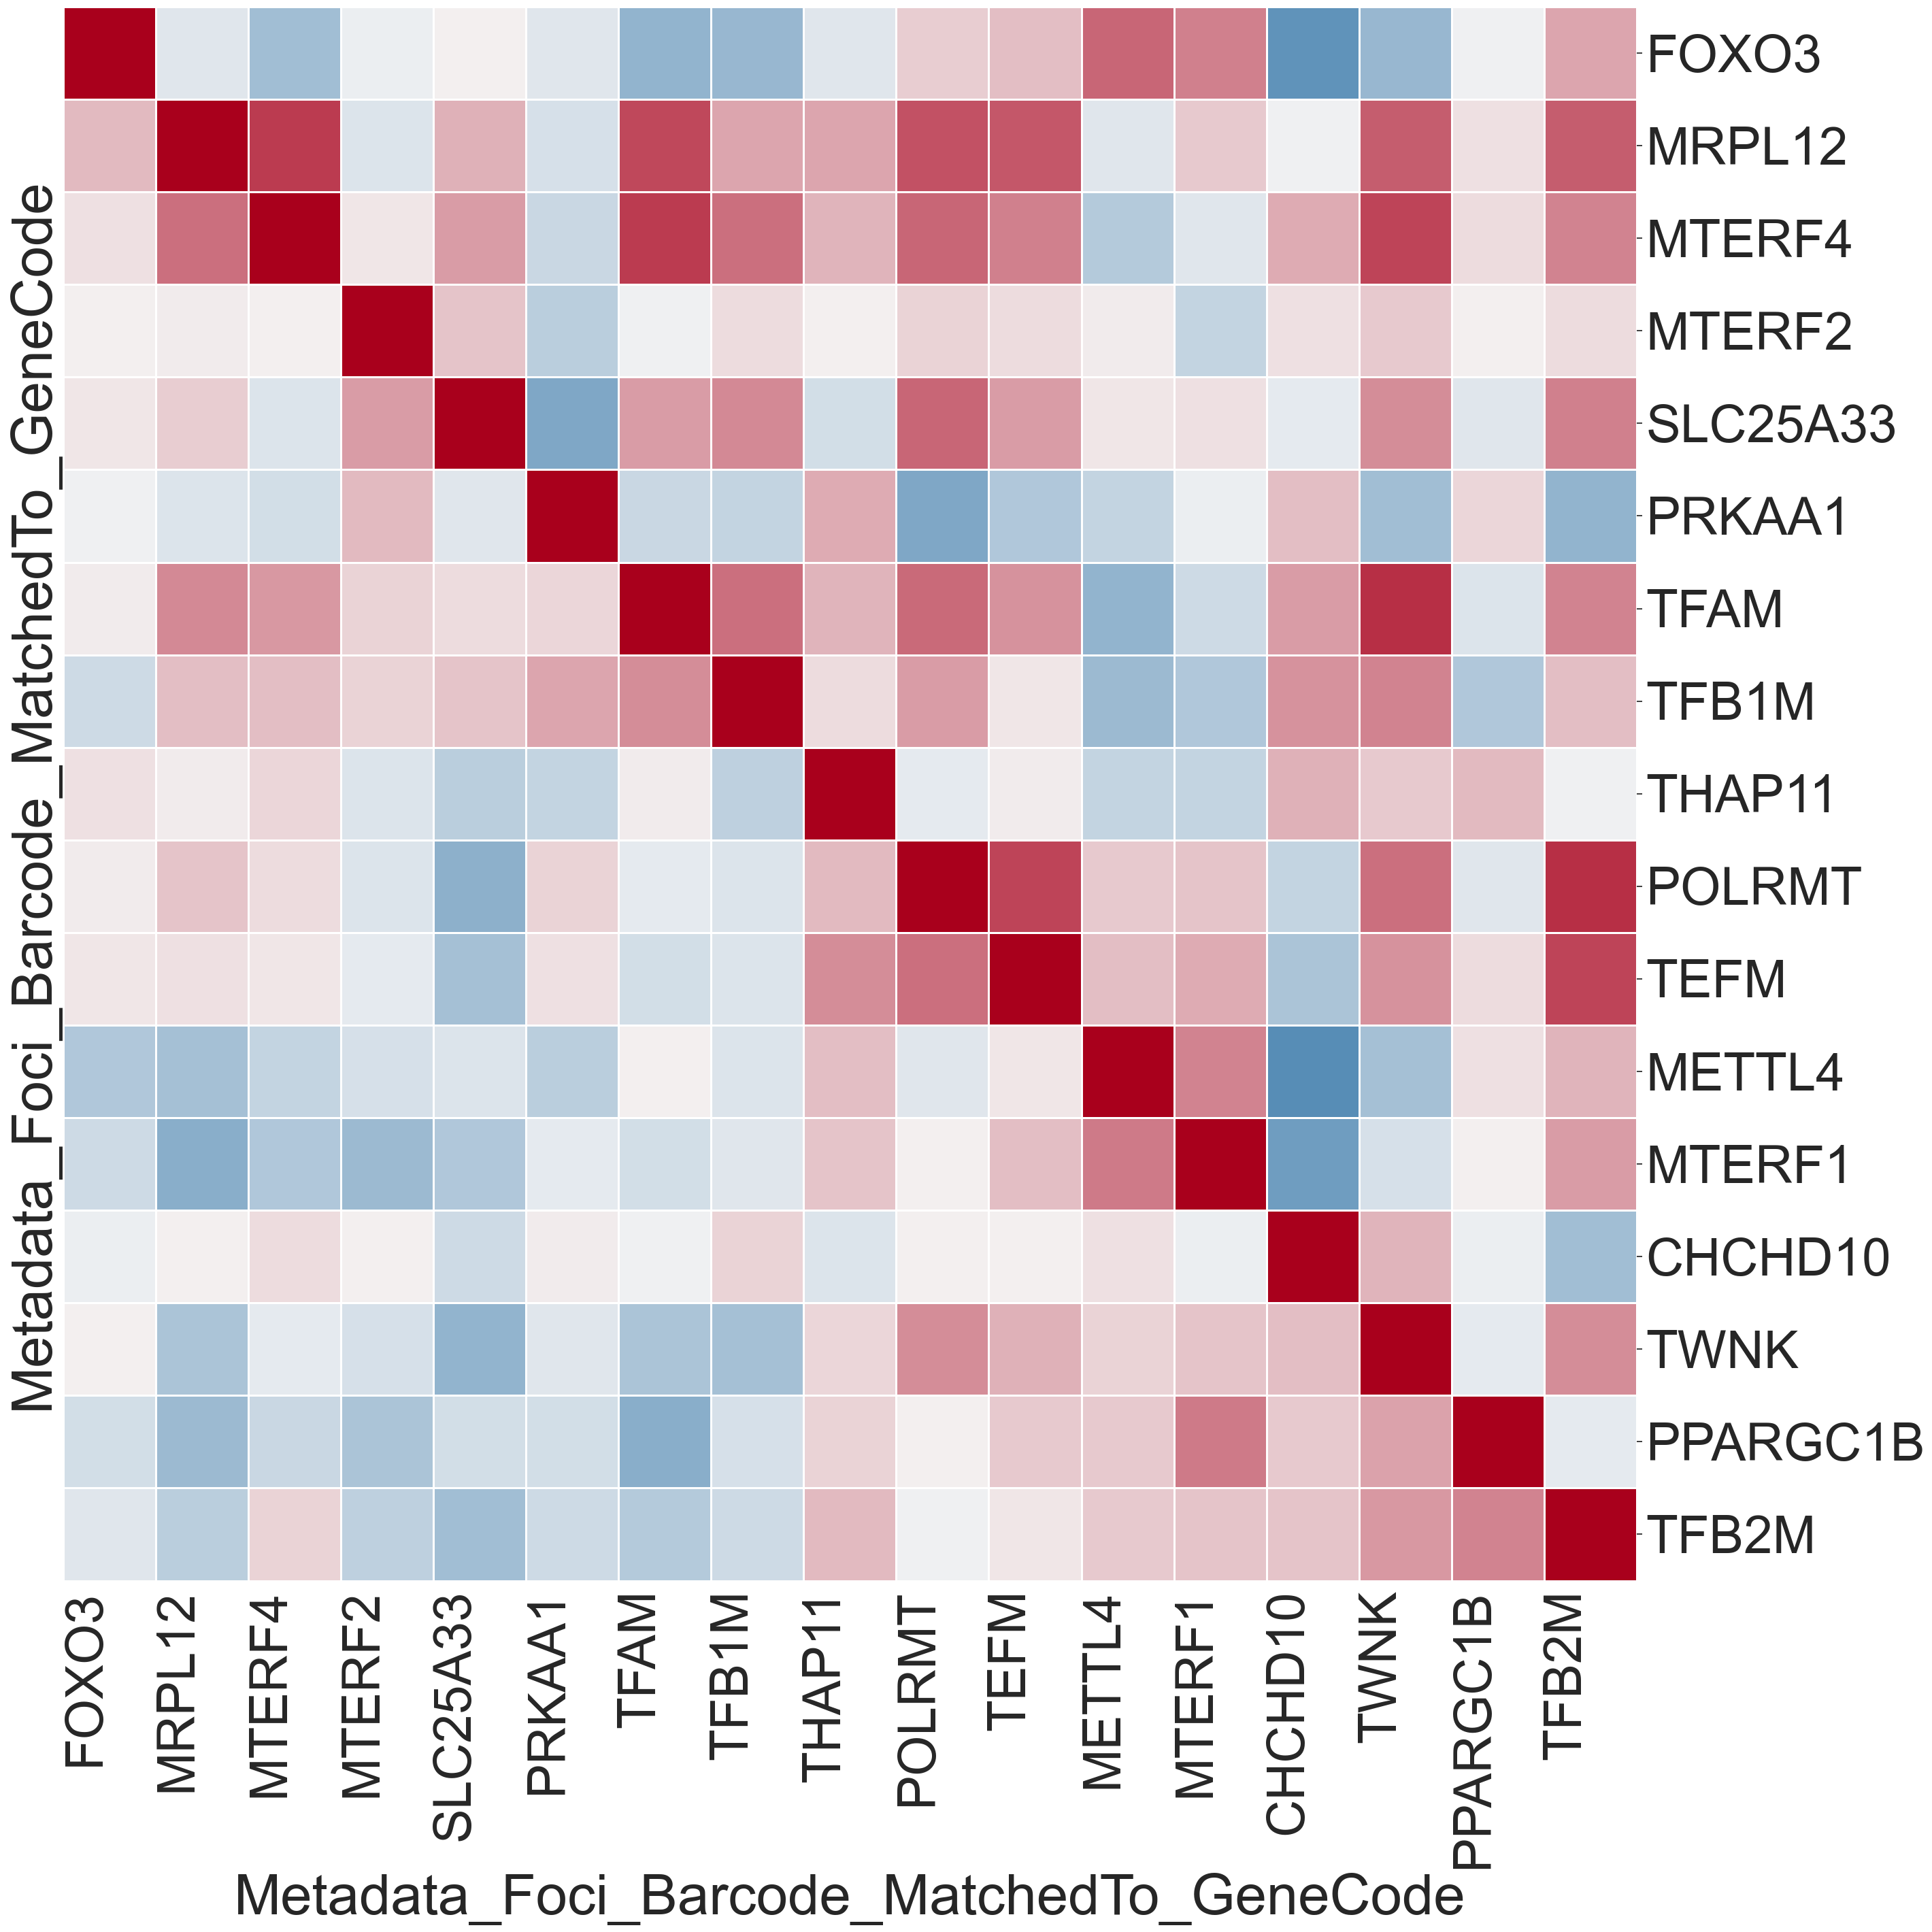

In [13]:
# Clustered based on the HPLM arm first
gene_set = 'GOBP_MITOCHONDRIAL_TRANSCRIPTION_HPLM_cluster'
genes = 'MTERF4	PPARGC1B	FOXO3	CHCHD10	TFB1M	MTRES1	POLRMT	PRKAA1	TWNK	THAP11	MRPL12	TFB2M	METTL4	TFAM	TEFM	MTERF1	MTERF2	SLC25A33'
coupled_heatmap(HeLa_HPLM_df,df_gene_DMEM,gene_set,genes,5)


<Figure size 1000x1000 with 0 Axes>

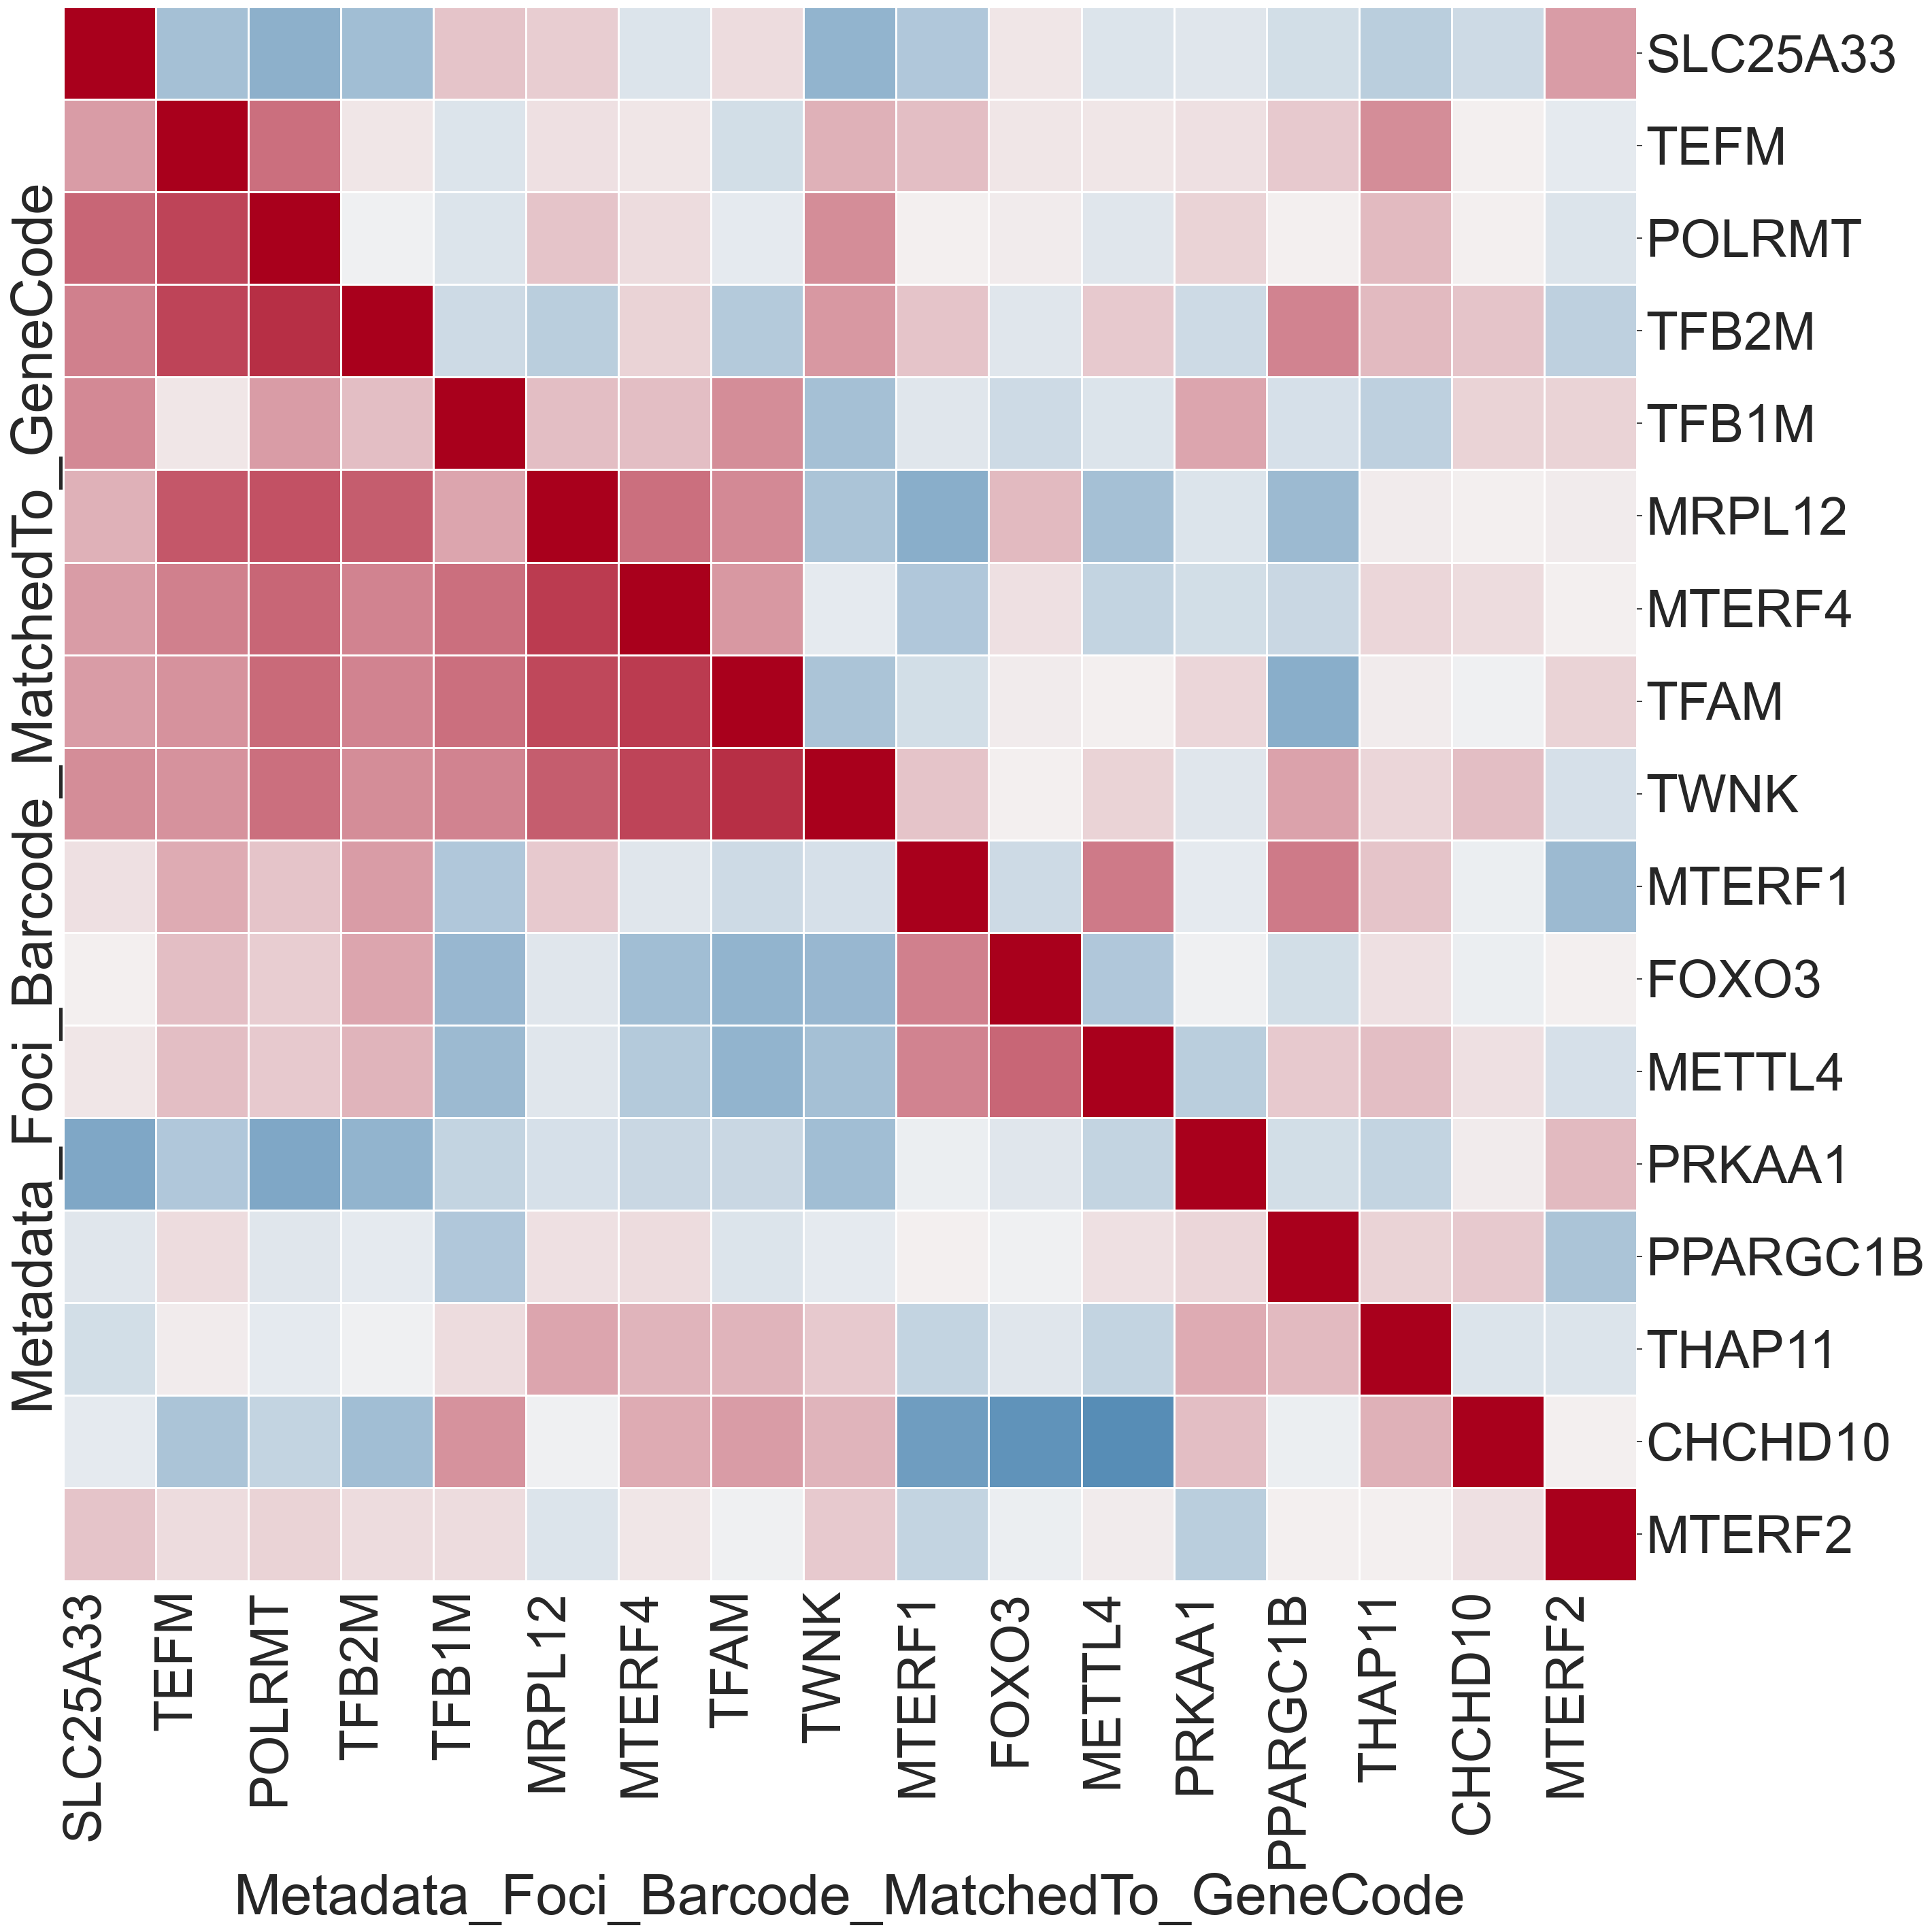

In [12]:
# Clustered based on the DMEM arm first
gene_set = 'GOBP_MITOCHONDRIAL_TRANSCRIPTION_DMEM_cluster'
genes = 'MTERF4	PPARGC1B	FOXO3	CHCHD10	TFB1M	MTRES1	POLRMT	PRKAA1	TWNK	THAP11	MRPL12	TFB2M	METTL4	TFAM	TEFM	MTERF1	MTERF2	SLC25A33'
coupled_heatmap(df_gene_DMEM,HeLa_HPLM_df,gene_set,genes,5)


<Figure size 1000x1000 with 0 Axes>

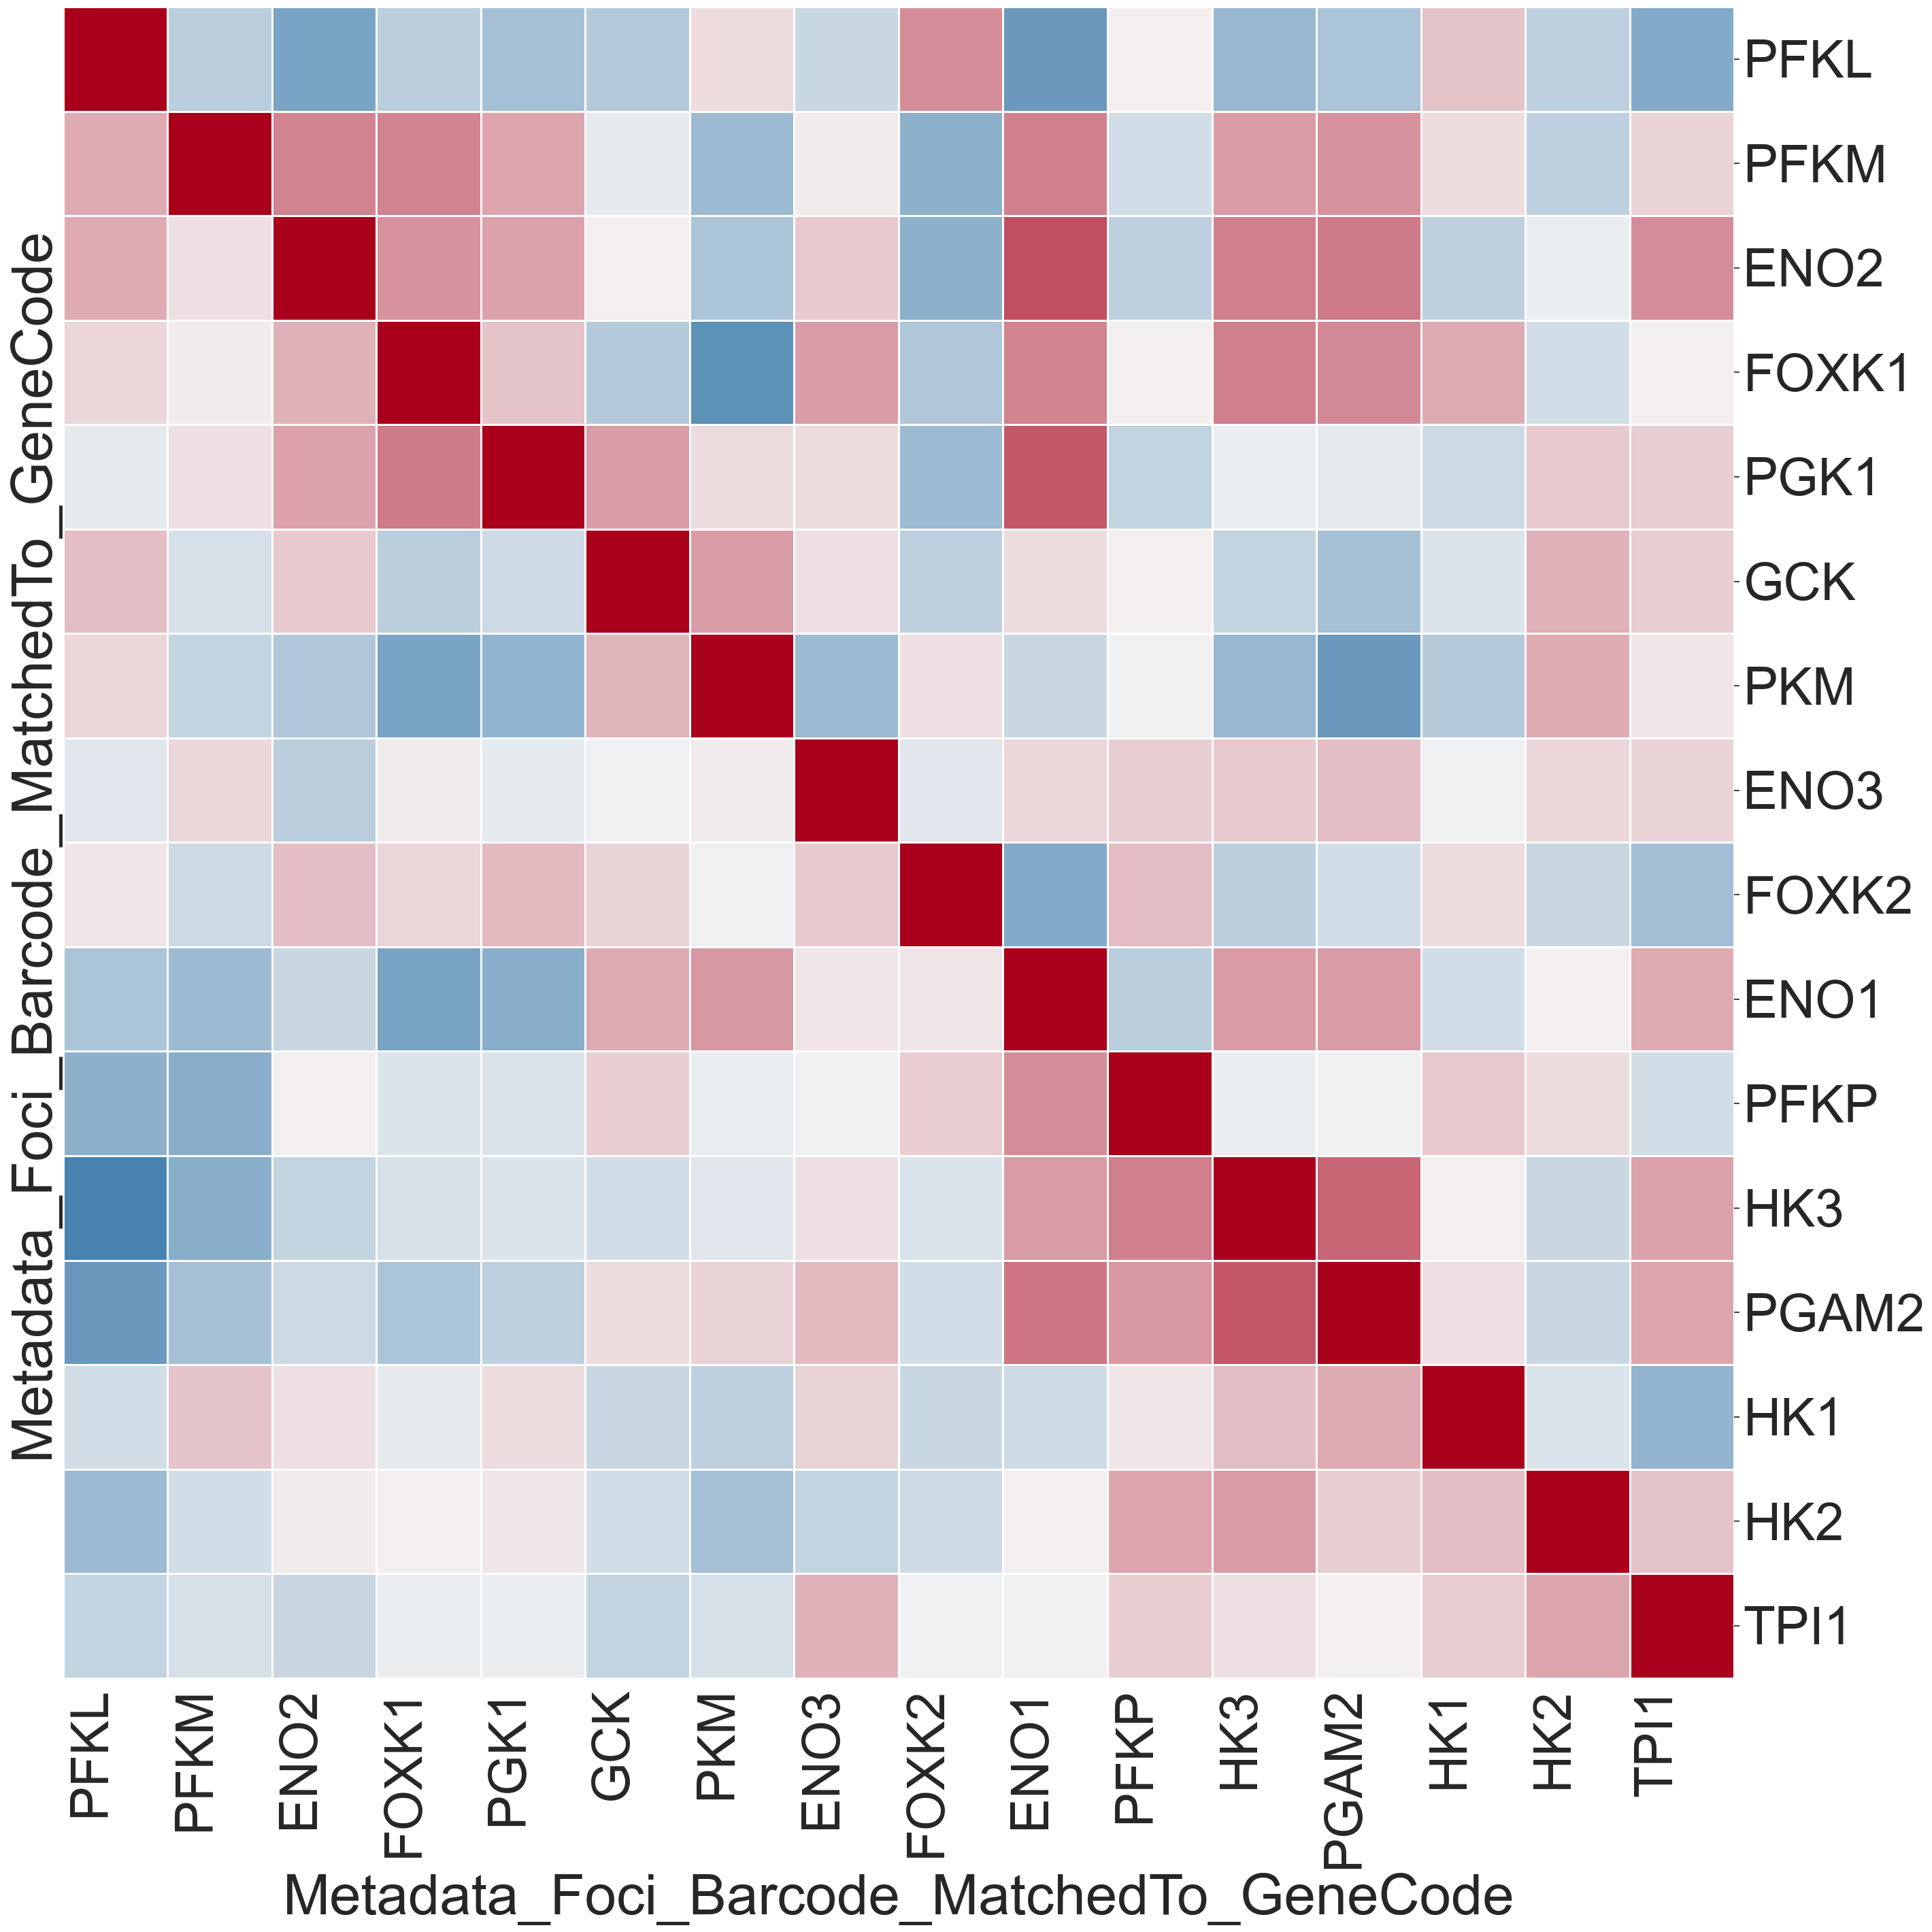

In [14]:
# Clustered based on the HPLM arm first
gene_set = 'GOBP_NADH_REGENERATION_HPLM_cluster'
genes = 'ENO1	ENO2	ENO3	FOXK1	GCK	HK1	HK2	HK3	FOXK2	PFKL	PFKM	PFKP	PGAM2	PGK1	PKM	TPI1'
coupled_heatmap(HeLa_HPLM_df,df_gene_DMEM,gene_set,genes,5)


<Figure size 1000x1000 with 0 Axes>

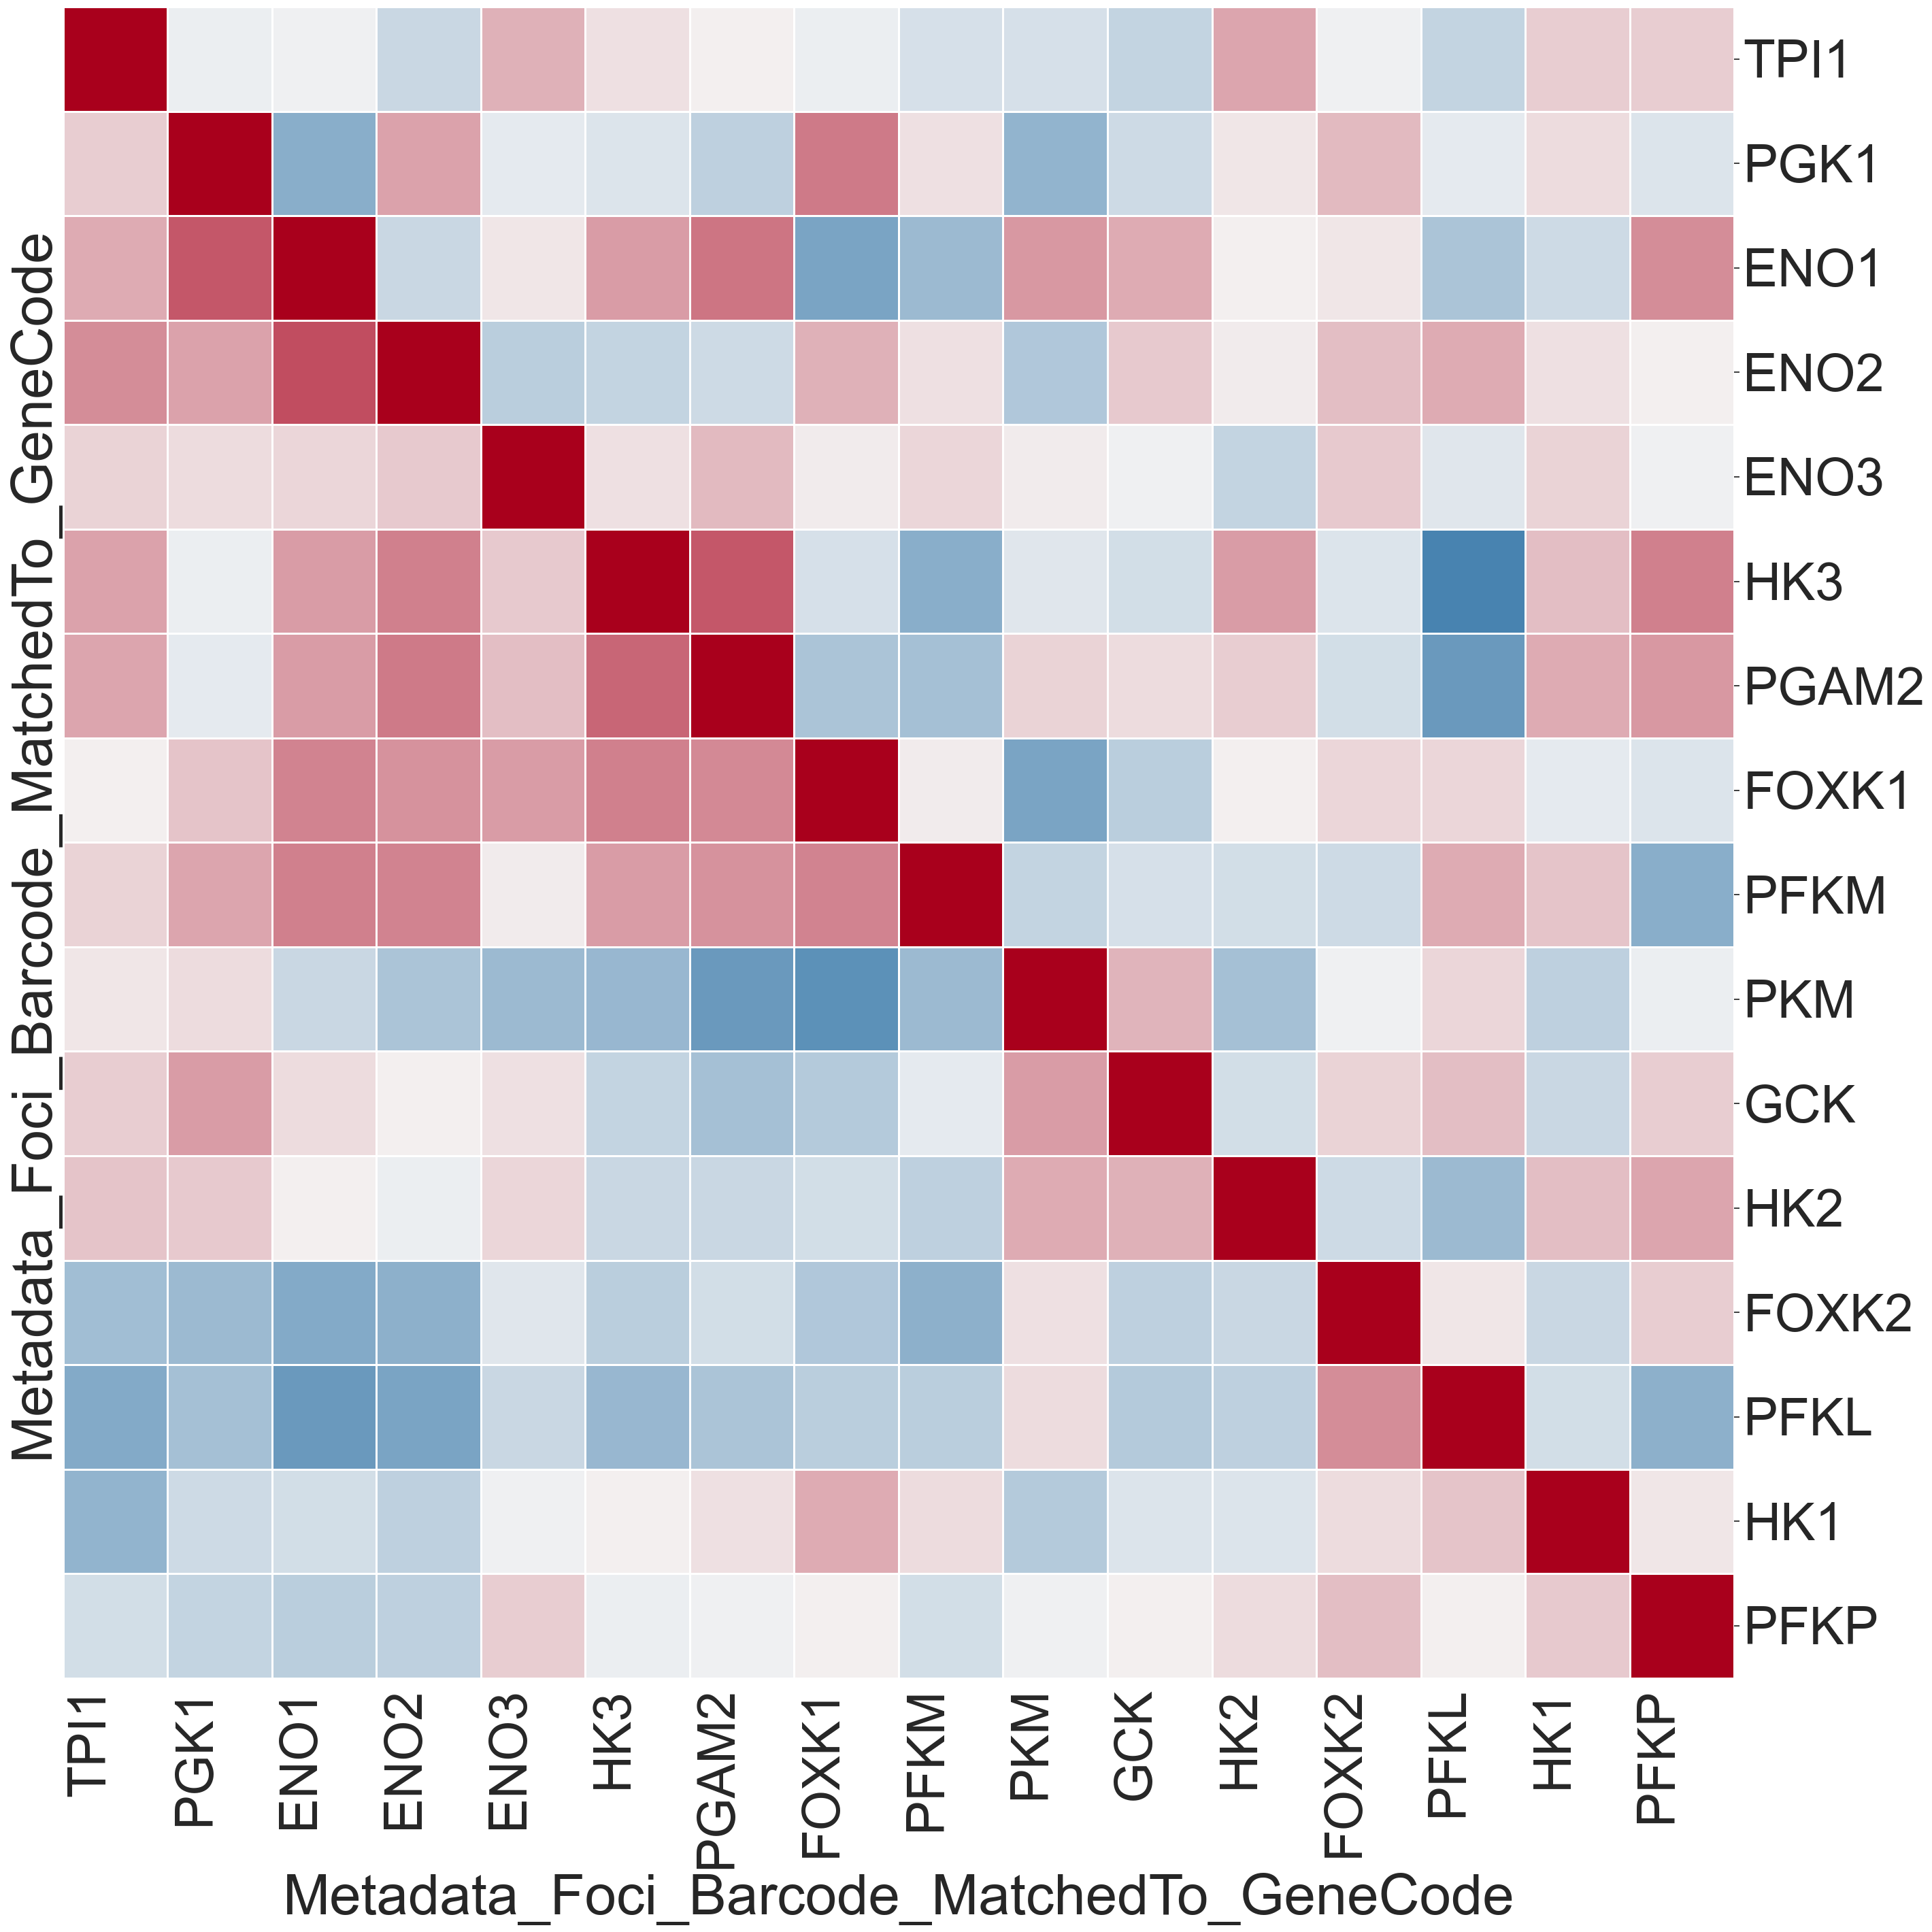

In [15]:
# Clustered based on the DMEM arm first
gene_set = 'GOBP_NADH_REGENERATION_DMEM_cluster'
genes = 'ENO1	ENO2	ENO3	FOXK1	GCK	HK1	HK2	HK3	FOXK2	PFKL	PFKM	PFKP	PGAM2	PGK1	PKM	TPI1'
coupled_heatmap(df_gene_DMEM,HeLa_HPLM_df,gene_set,genes,5)


<Figure size 1000x1000 with 0 Axes>

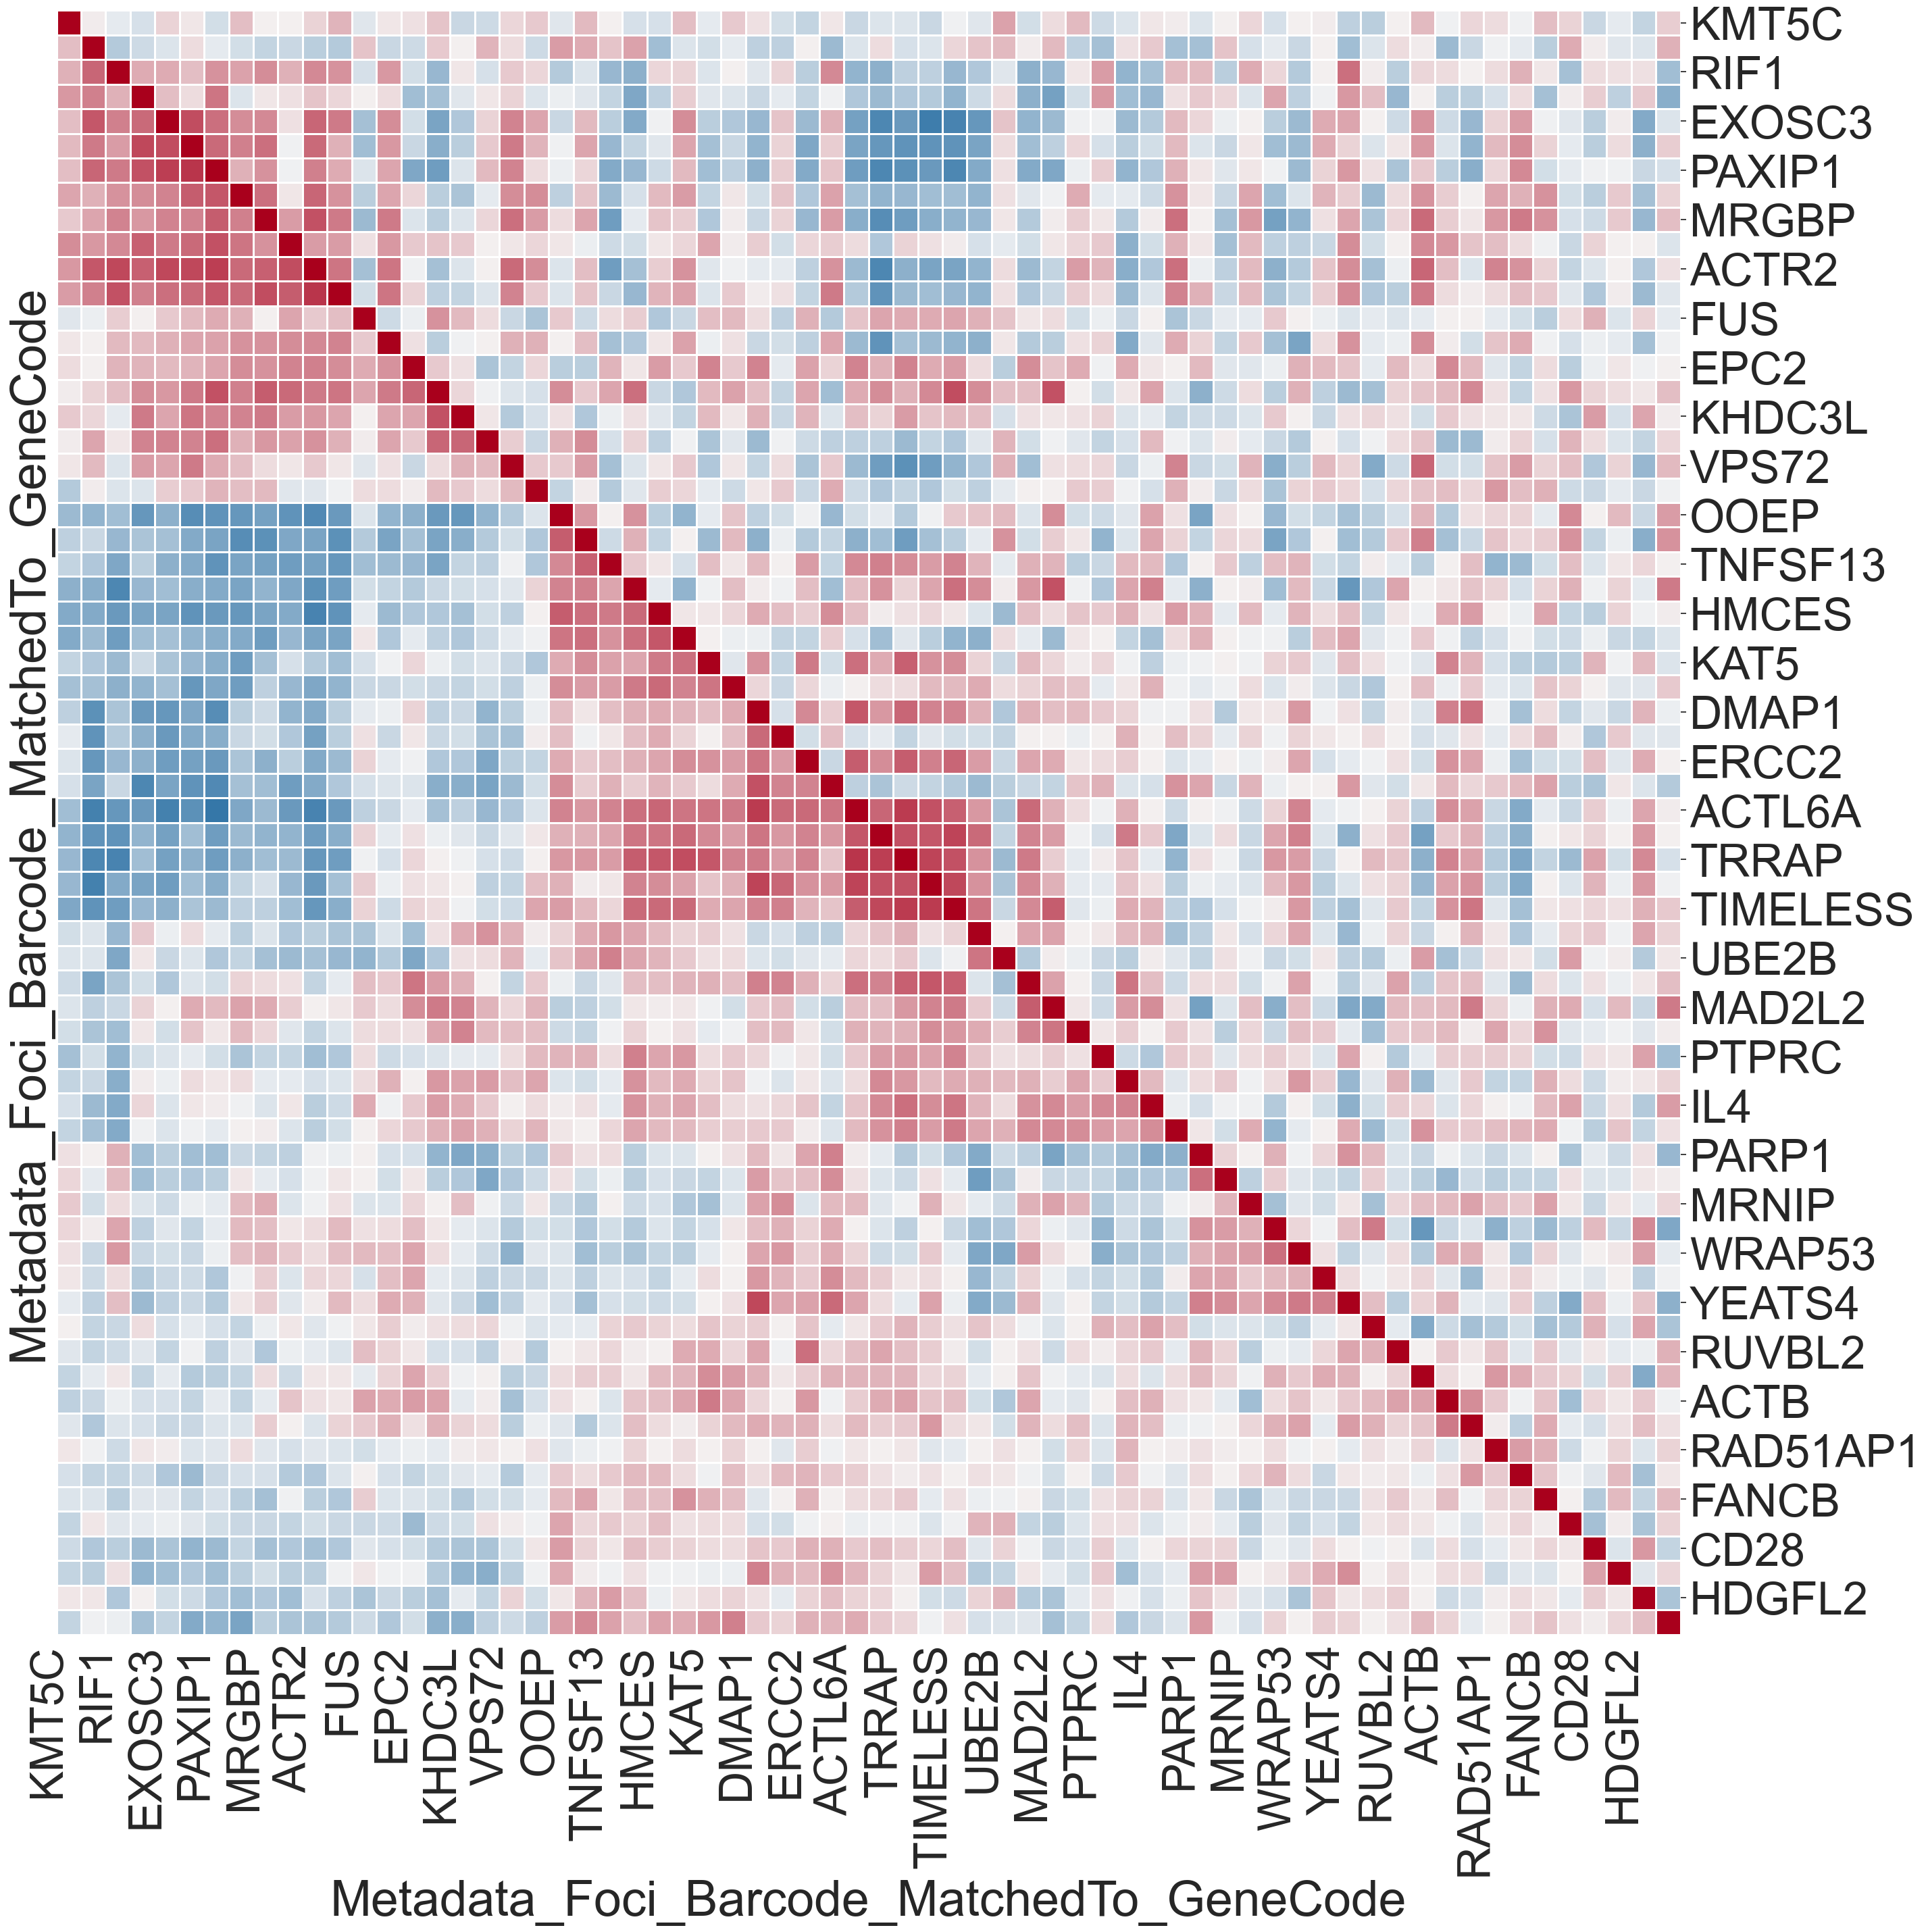

In [18]:
# Clustered based on the HPLM arm first
gene_set = 'GOBP_POSITIVE_REGULATION_OF_DNA_RECOMBINATION_HPLM_cluster'
genes = 'ACTR2	MAD2L2	KAT5	RAD51AP1	RUVBL2	BRD8	MORF4L1	PRDM7	SHLD3	EXOSC6	PARP1	SHLD1	KHDC3L	ARID2	ERCC2	ERCC6	FANCB	PAXIP1	POGZ	CLCF1	FUS	EPC2	TBX21	IL2	IL4	MLH1	OOEP	MSH2	EXOSC3	KMT5B	MRNIP	SHLD2	ING3	MBTD1	ZCWPW1	WRAP53	RIF1	MRGBP	DMAP1	HMCES	PRDM9	WDR48	EP400	PTPRC	RBBP8	ACTB	MMS19	MEAF6	STAT6	VPS72	TFRC	TGFB1	TP53BP1	TNFSF4	UBE2B	WAS	NSD2	ATAD5	EPC1	YEATS4	TRRAP	HDGFL2	KMT5C	ACTL6A	RUVBL1	TNFSF13	TIMELESS	CD28	CD40	MORF4L2'
coupled_heatmap(HeLa_HPLM_df,df_gene_DMEM,gene_set,genes,4.4)

<Figure size 1000x1000 with 0 Axes>

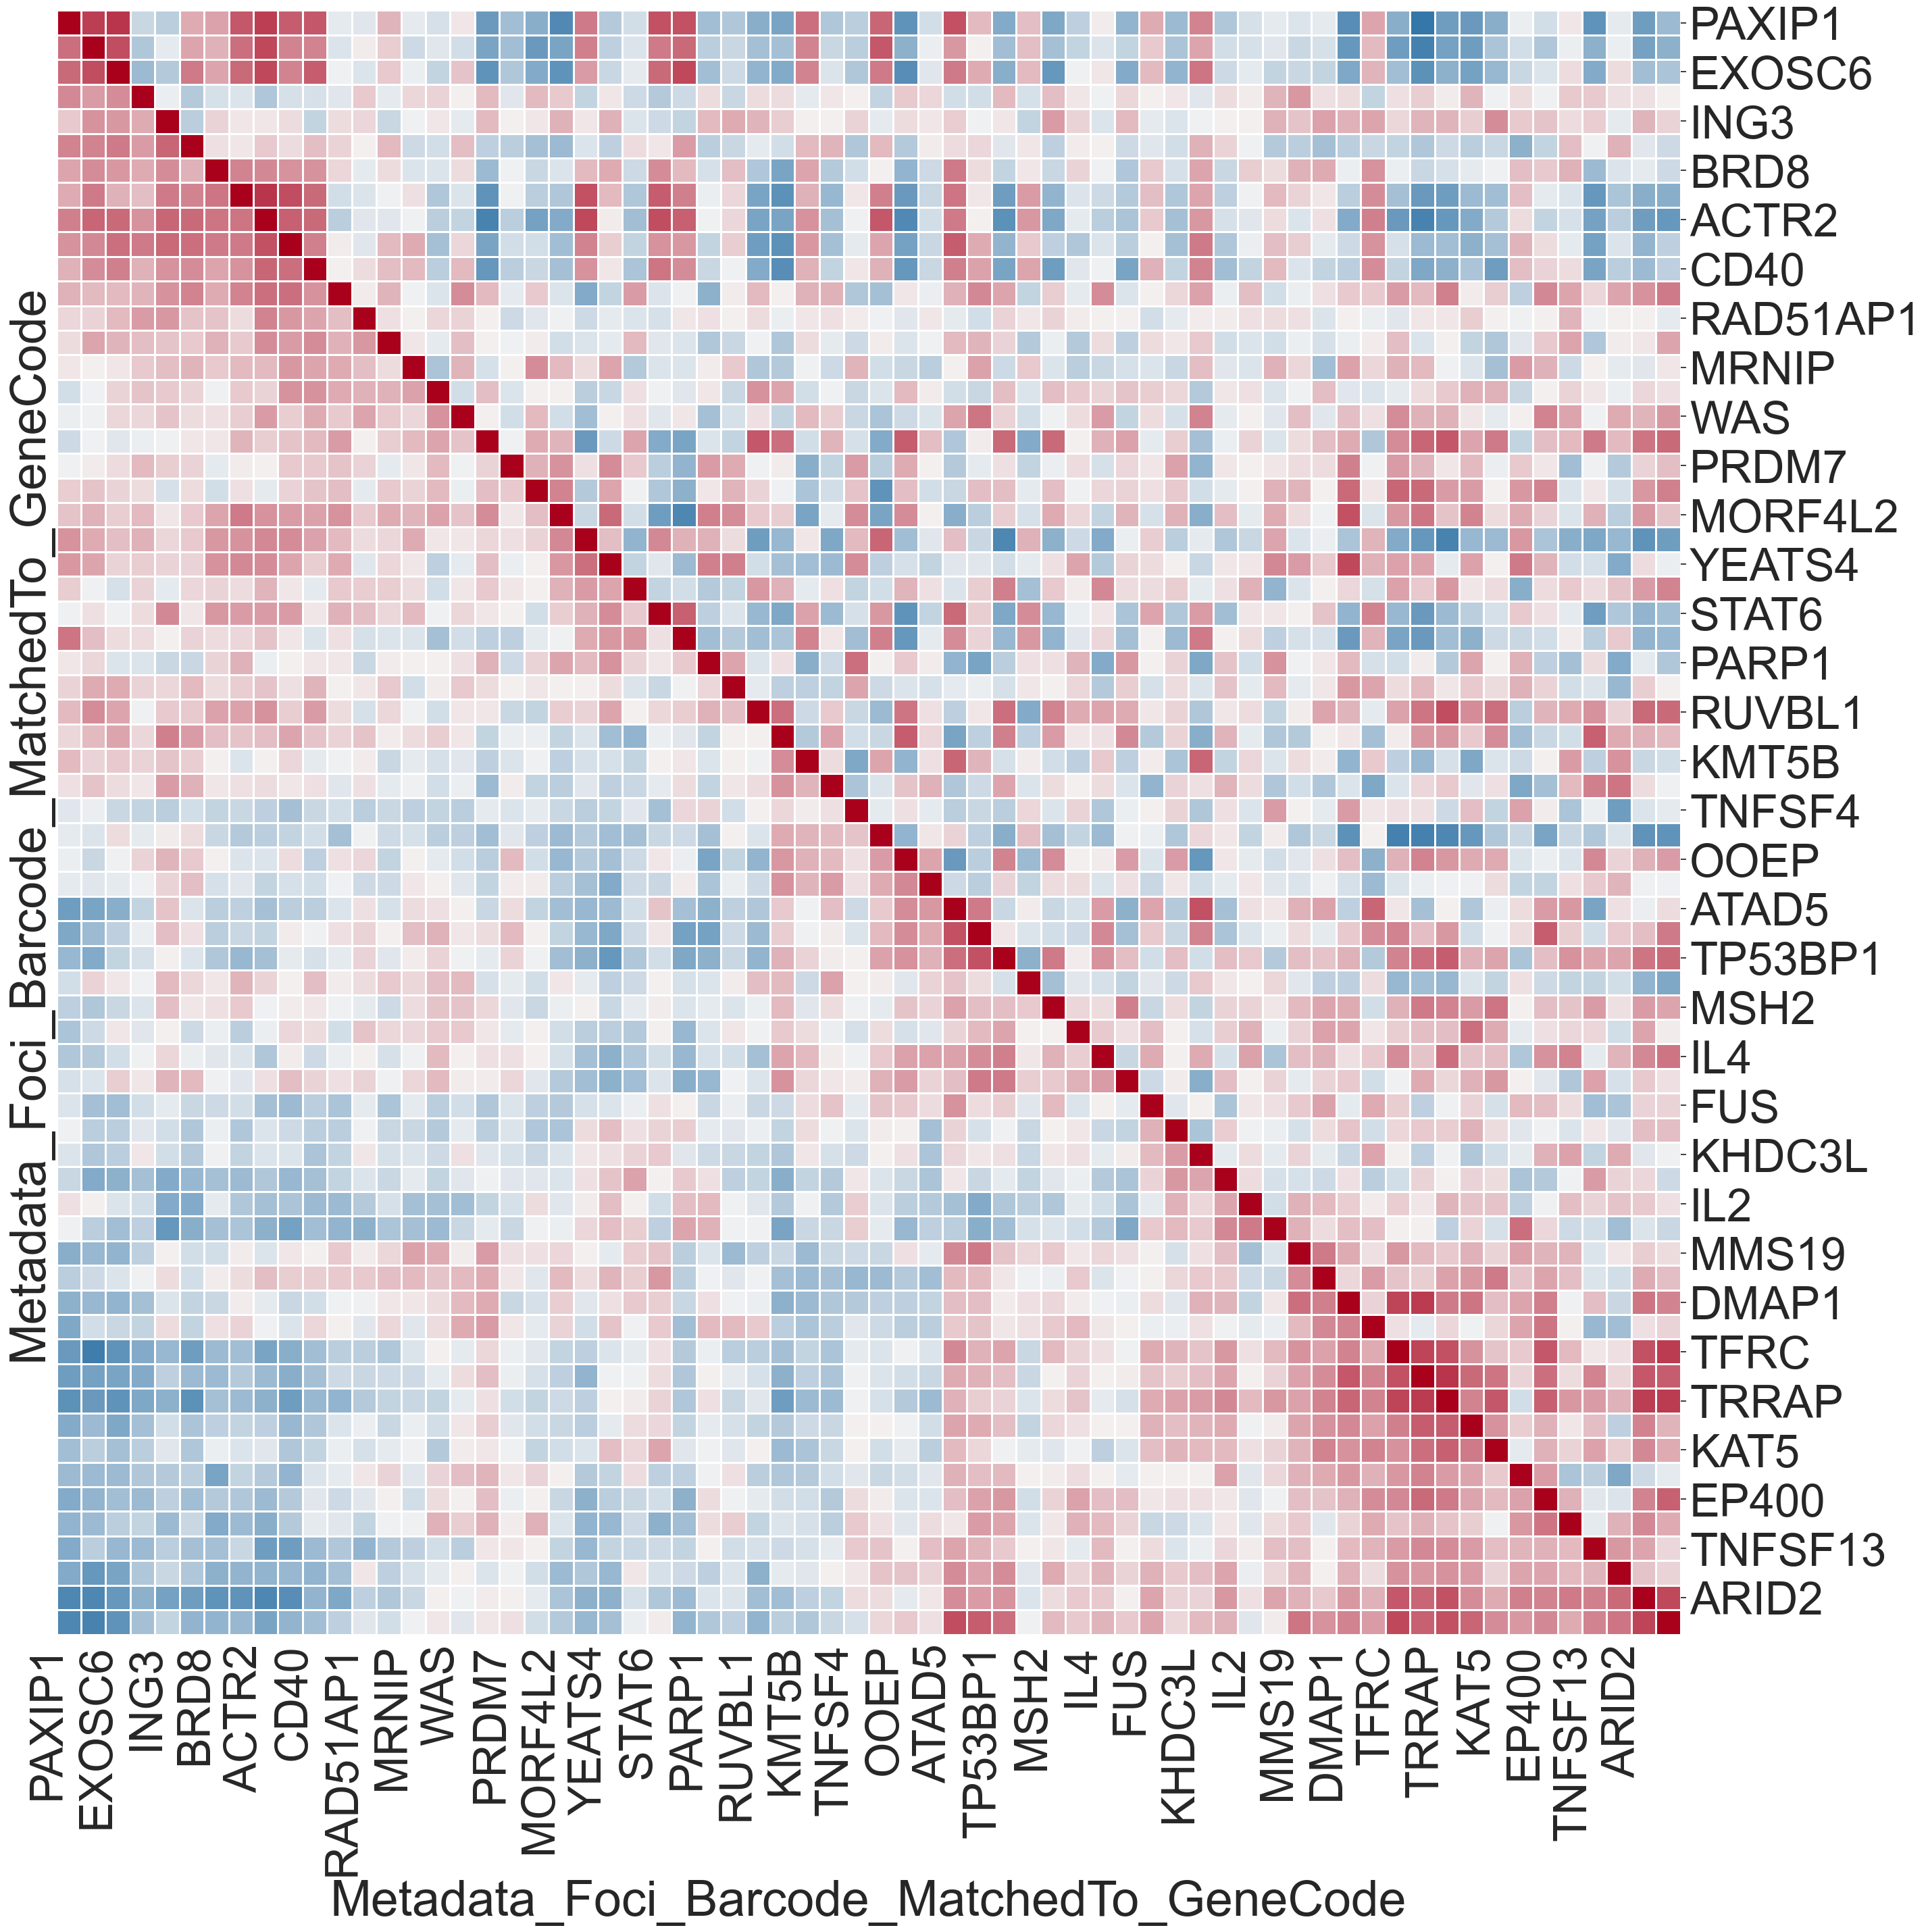

In [17]:
# Clustered based on the DMEM arm first
gene_set = 'GOBP_POSITIVE_REGULATION_OF_DNA_RECOMBINATION_DMEM_cluster'
genes = 'ACTR2	MAD2L2	KAT5	RAD51AP1	RUVBL2	BRD8	MORF4L1	PRDM7	SHLD3	EXOSC6	PARP1	SHLD1	KHDC3L	ARID2	ERCC2	ERCC6	FANCB	PAXIP1	POGZ	CLCF1	FUS	EPC2	TBX21	IL2	IL4	MLH1	OOEP	MSH2	EXOSC3	KMT5B	MRNIP	SHLD2	ING3	MBTD1	ZCWPW1	WRAP53	RIF1	MRGBP	DMAP1	HMCES	PRDM9	WDR48	EP400	PTPRC	RBBP8	ACTB	MMS19	MEAF6	STAT6	VPS72	TFRC	TGFB1	TP53BP1	TNFSF4	UBE2B	WAS	NSD2	ATAD5	EPC1	YEATS4	TRRAP	HDGFL2	KMT5C	ACTL6A	RUVBL1	TNFSF13	TIMELESS	CD28	CD40	MORF4L2'
coupled_heatmap(df_gene_DMEM,HeLa_HPLM_df,gene_set,genes,4.4)

<Figure size 1000x1000 with 0 Axes>

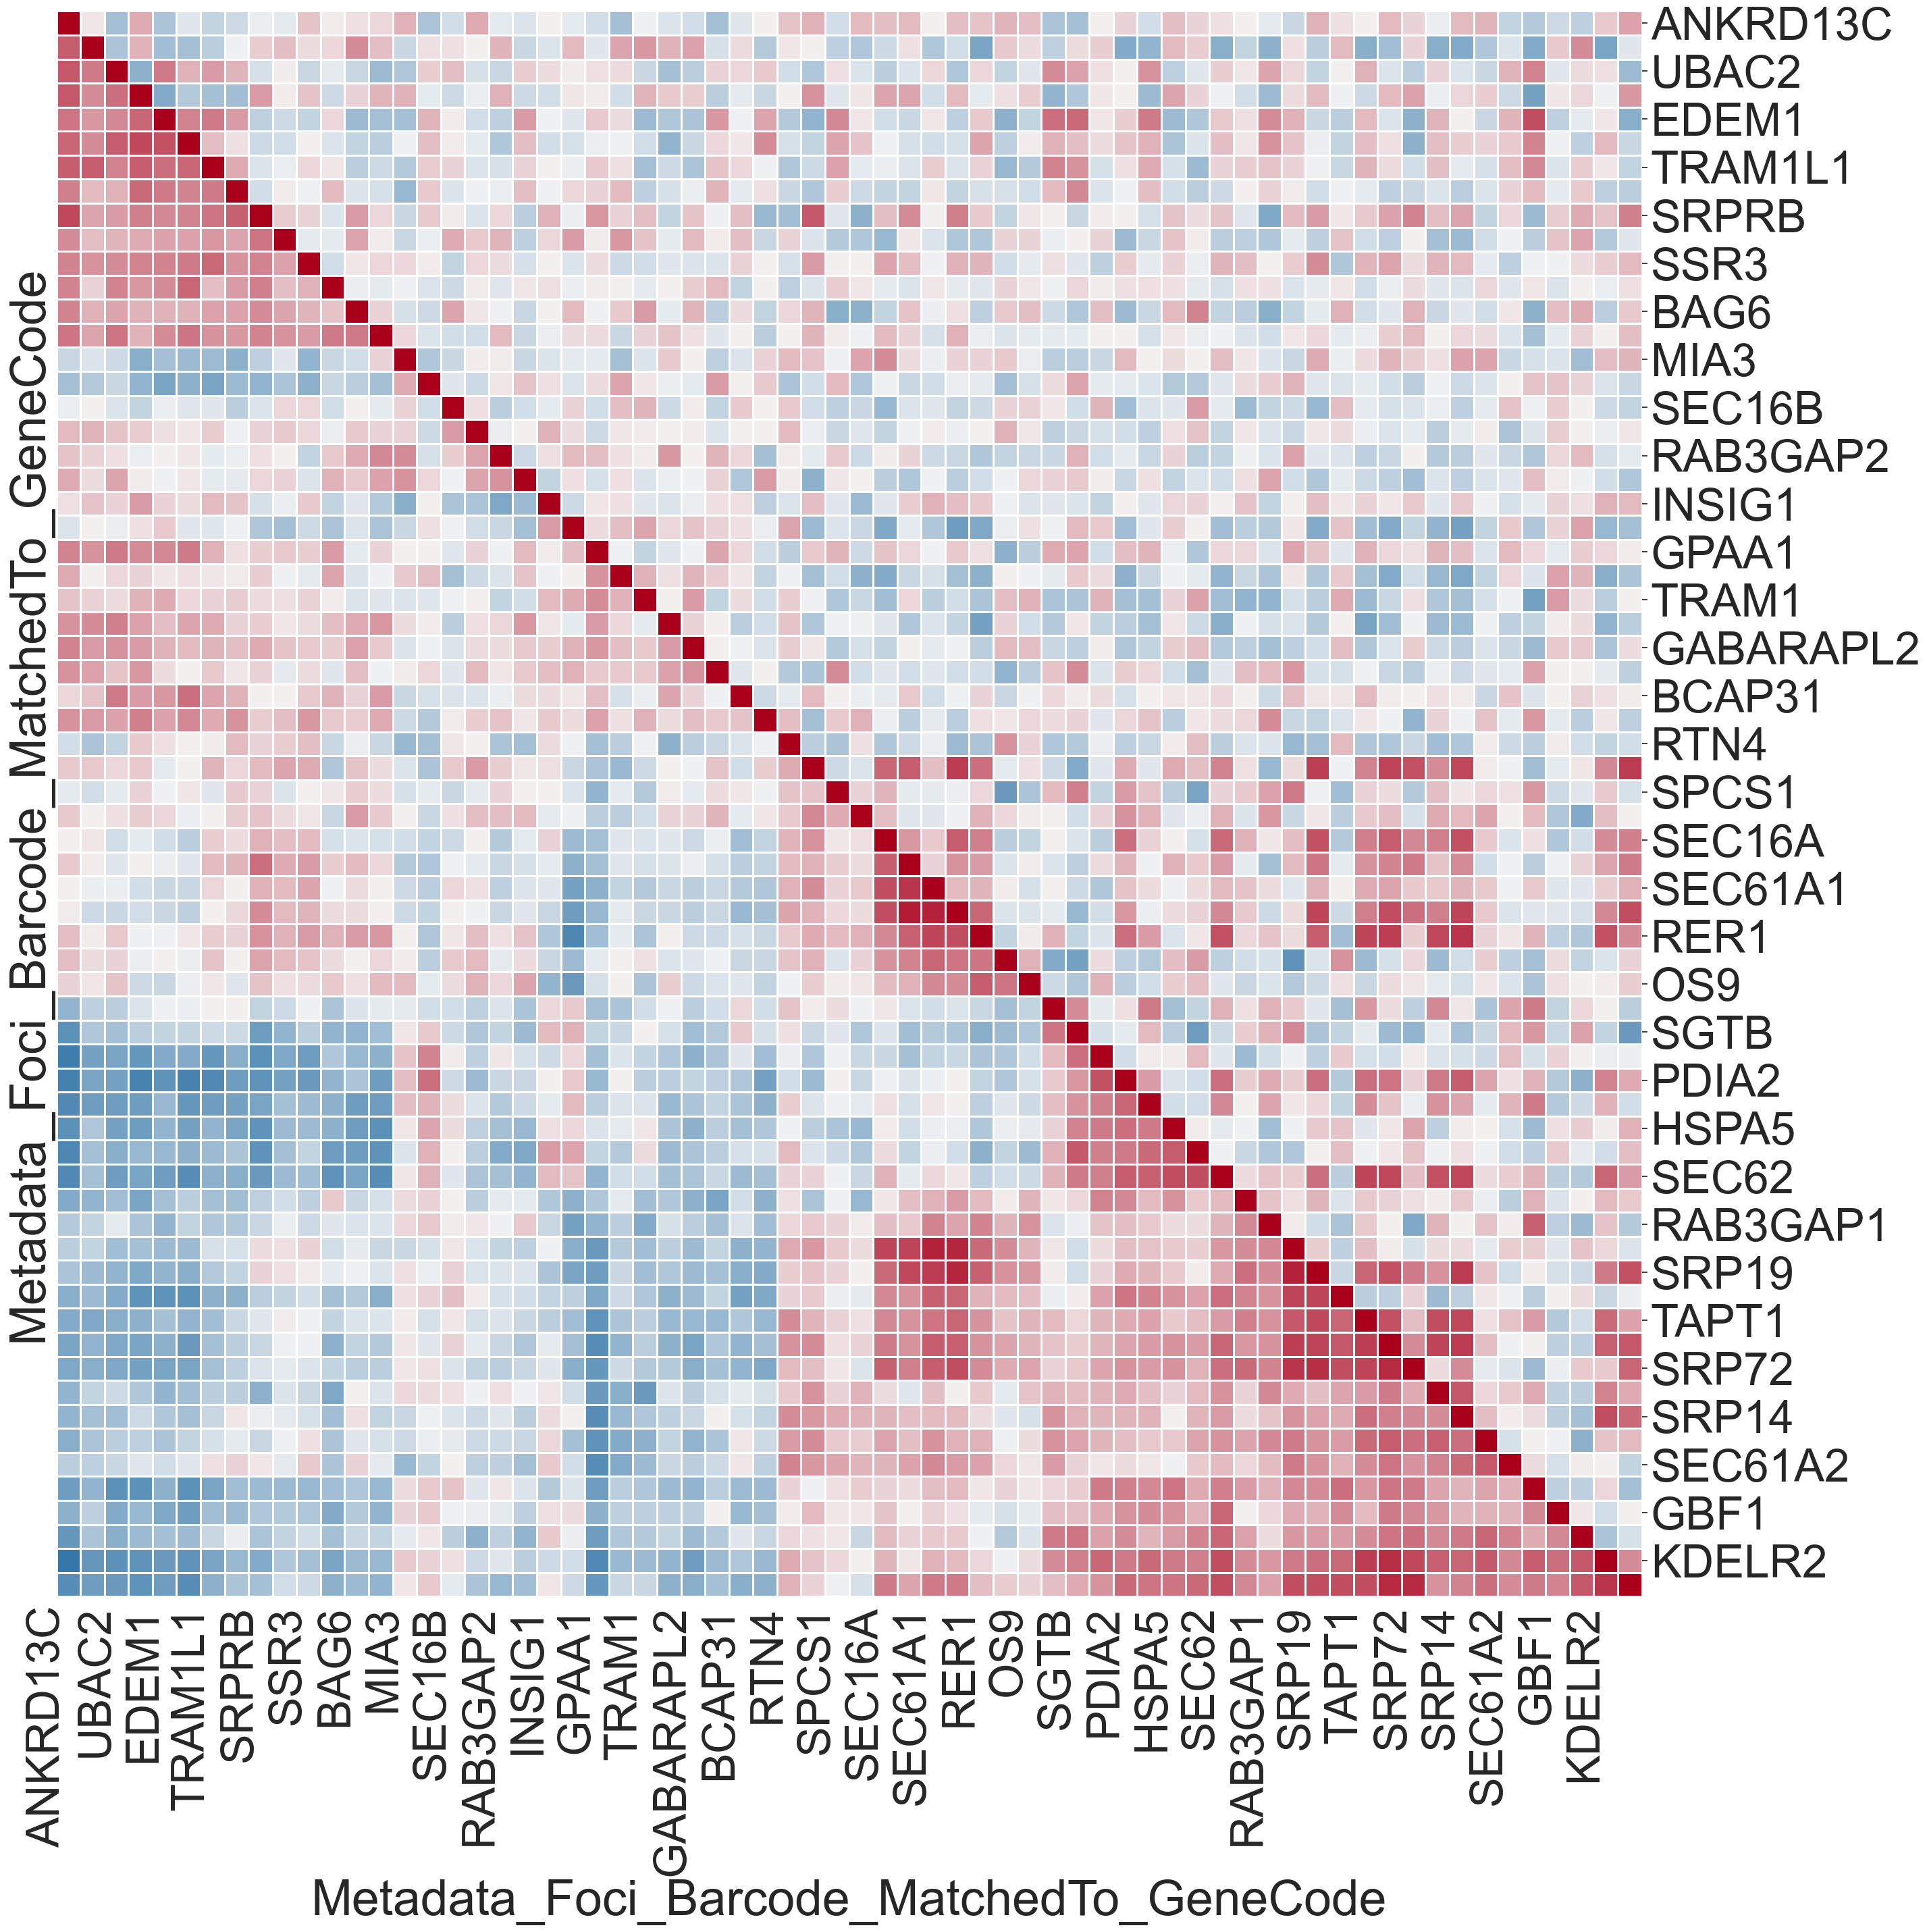

In [19]:
# Clustered based on the HPLM arm first
gene_set = 'GOBP_PROTEIN_LOCALIZATION_TO_ENDOPLASMIC_RETICULUM_HPLM_cluster'
genes = 'SNAP25-AS1	BHLHE40-AS1	BCAP31	TTC9-DT	GJD2-DT	ENSG00000283175	RAB10	KDELR1	SEC61B	OS9	KDELR2	KDELR3	RER1	CRYZL2P-SEC16B	SEC63	GABARAPL2	LRRK2	CHMP4B	ZFAND2B	TRAM1L1	TAPT1	RAB3GAP1	TRAM1	SEC61G	PPP1R15A	RAB3GAP2	GLP1R	ANK2	SPCS1	GRIK5	CHMP4A	SEC61A1	HSPA5	UBAC2	INSIG1	MIA3	RN7SL2	RN7SL3	MAN1A1	GET3	INSIG2	GET4	SGTB	SEC61A2	BCAP29	RTN4	SRPRB	RN7SL1	SPCS3	RYR2	SGTA	PDIA2	DDRGK1	SRP9	SRP14	SRP19	SRP54	SRP68	SRP72	SRPRA	SSR3	BTF3	SEC62	BAG6	ANKRD13C	UBL4A	GBF1	GPAA1	SEC16B	ZFAND2A	VAPA	EDEM1	TRAM2	HERPUD1	SPCS2	SEC16A'
coupled_heatmap(HeLa_HPLM_df,df_gene_DMEM,gene_set,genes,4.4)


<Figure size 1000x1000 with 0 Axes>

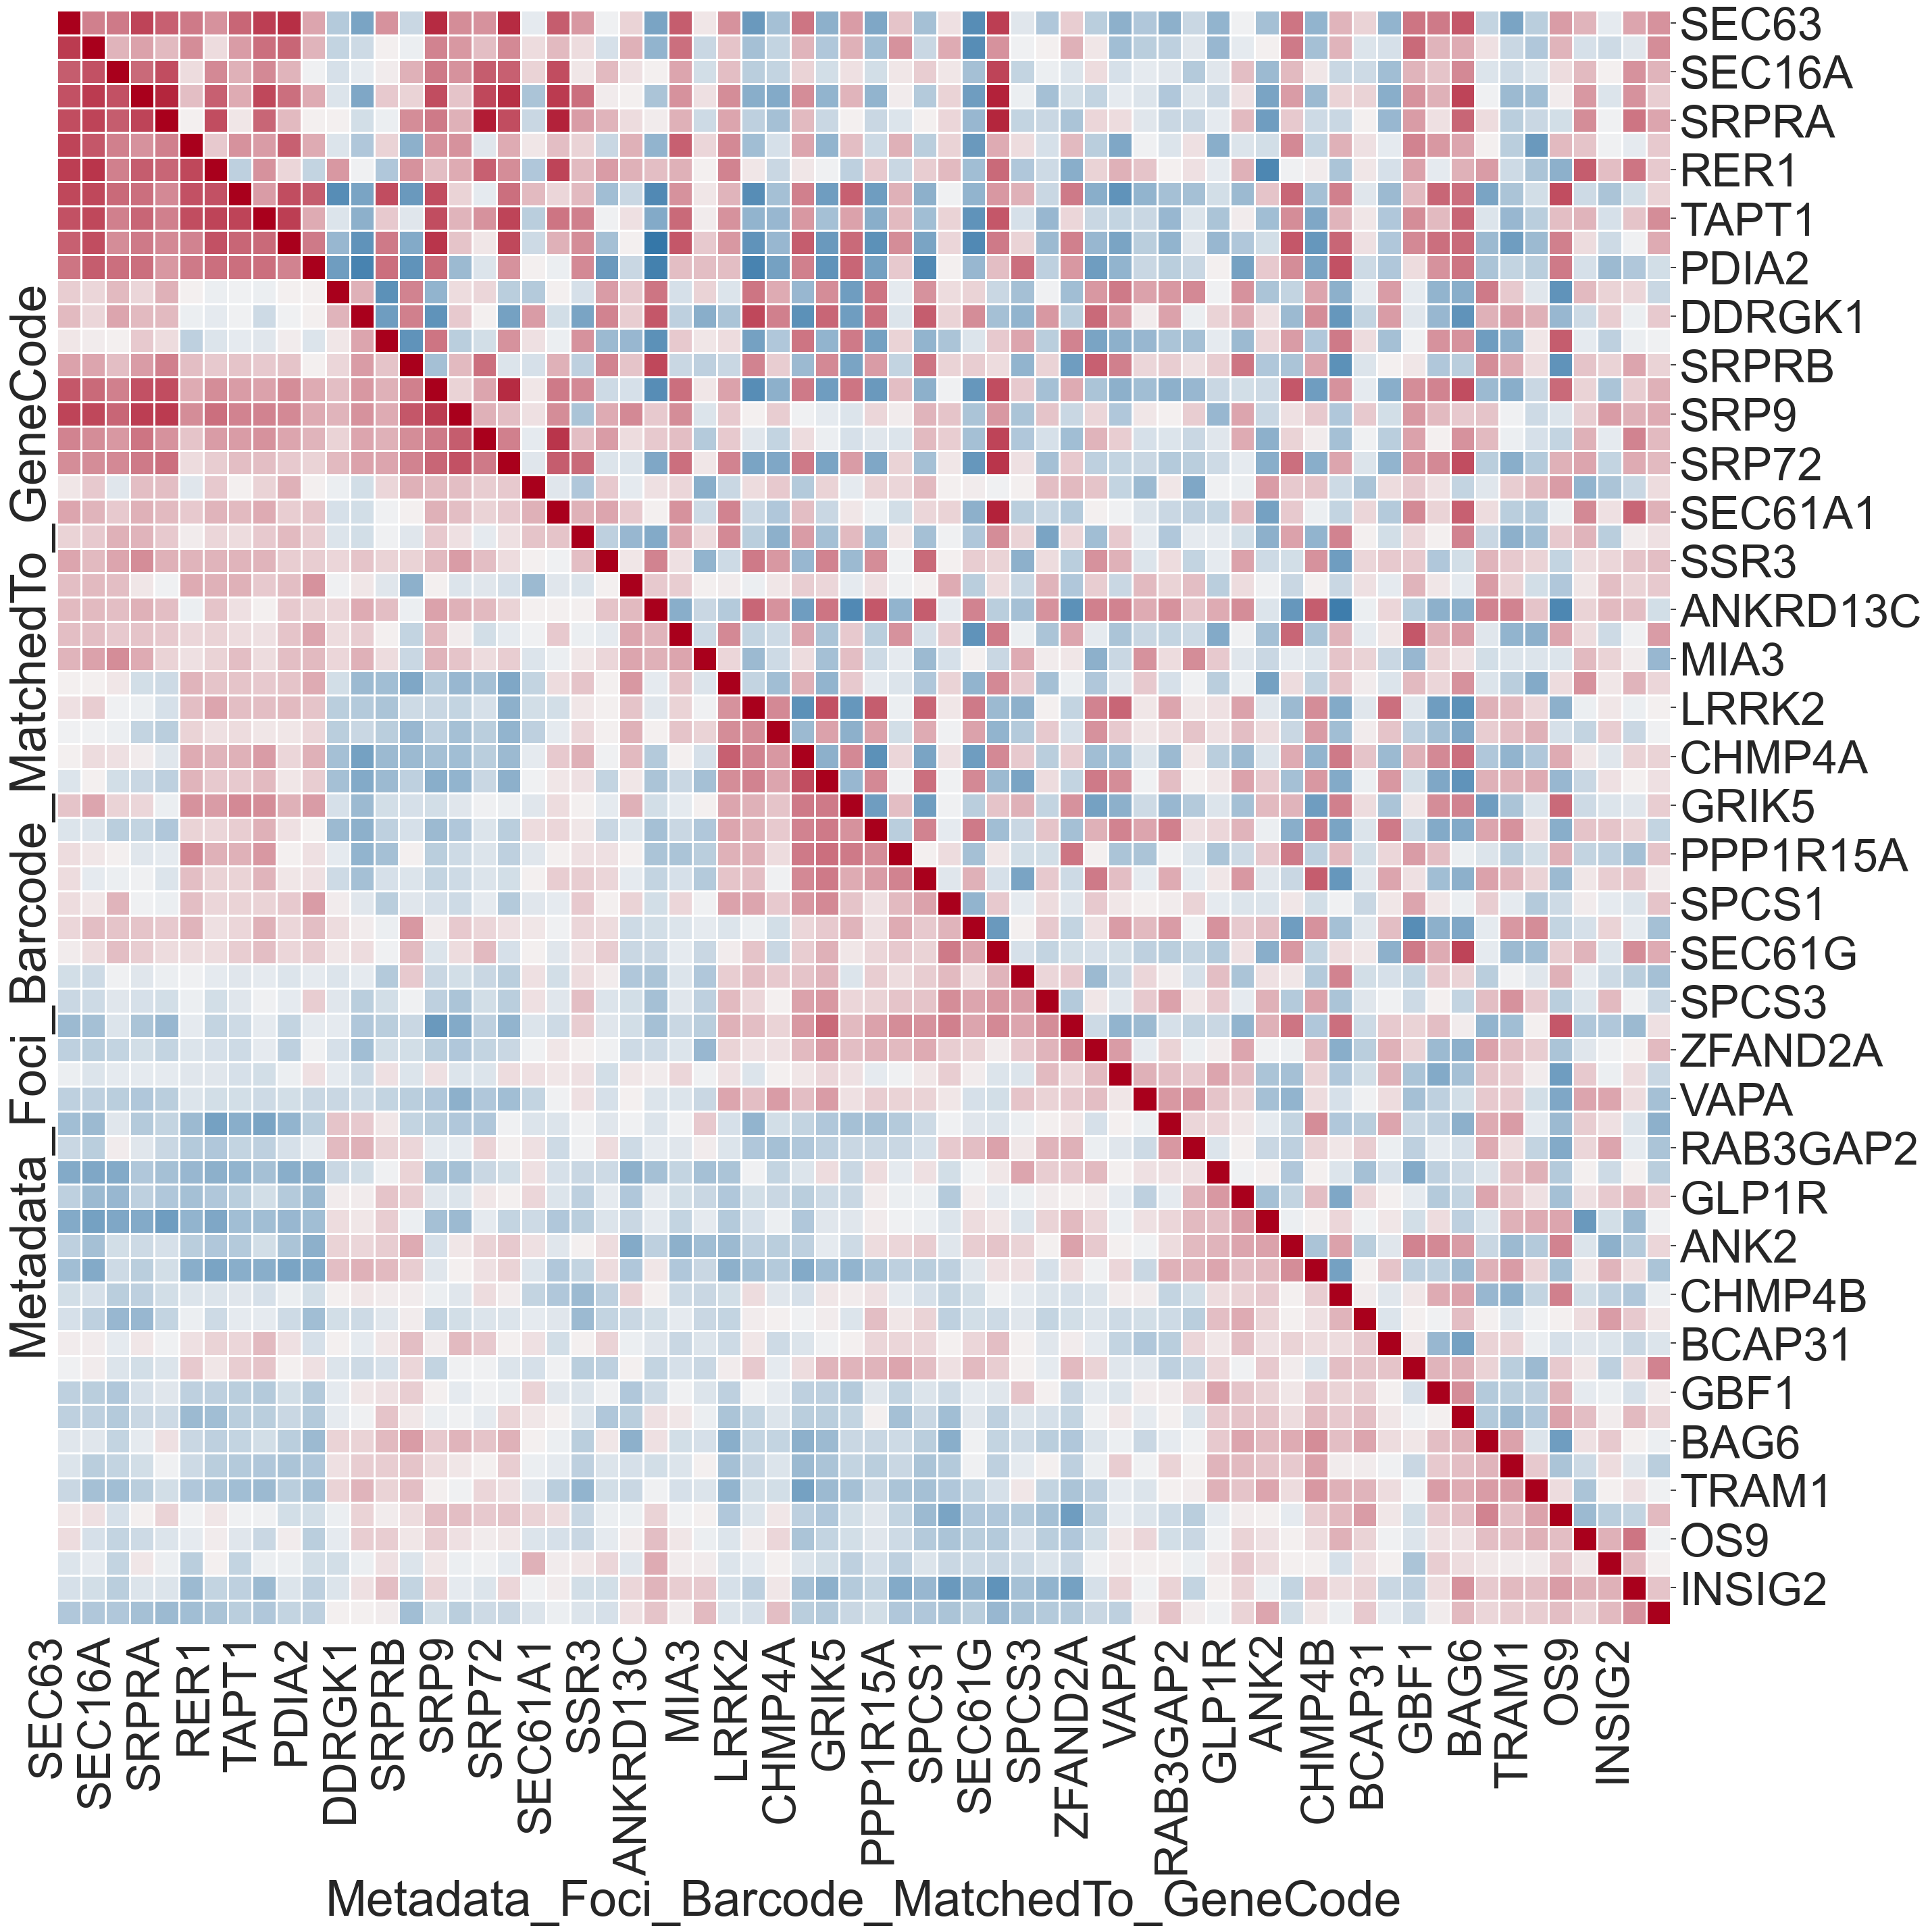

In [20]:
# Clustered based on the DMEM arm first
gene_set = 'GOBP_PROTEIN_LOCALIZATION_TO_ENDOPLASMIC_RETICULUM_DMEM_cluster'
genes = 'SNAP25-AS1	BHLHE40-AS1	BCAP31	TTC9-DT	GJD2-DT	ENSG00000283175	RAB10	KDELR1	SEC61B	OS9	KDELR2	KDELR3	RER1	CRYZL2P-SEC16B	SEC63	GABARAPL2	LRRK2	CHMP4B	ZFAND2B	TRAM1L1	TAPT1	RAB3GAP1	TRAM1	SEC61G	PPP1R15A	RAB3GAP2	GLP1R	ANK2	SPCS1	GRIK5	CHMP4A	SEC61A1	HSPA5	UBAC2	INSIG1	MIA3	RN7SL2	RN7SL3	MAN1A1	GET3	INSIG2	GET4	SGTB	SEC61A2	BCAP29	RTN4	SRPRB	RN7SL1	SPCS3	RYR2	SGTA	PDIA2	DDRGK1	SRP9	SRP14	SRP19	SRP54	SRP68	SRP72	SRPRA	SSR3	BTF3	SEC62	BAG6	ANKRD13C	UBL4A	GBF1	GPAA1	SEC16B	ZFAND2A	VAPA	EDEM1	TRAM2	HERPUD1	SPCS2	SEC16A'
coupled_heatmap(df_gene_DMEM,HeLa_HPLM_df,gene_set,genes,4.4)


<Figure size 1000x1000 with 0 Axes>

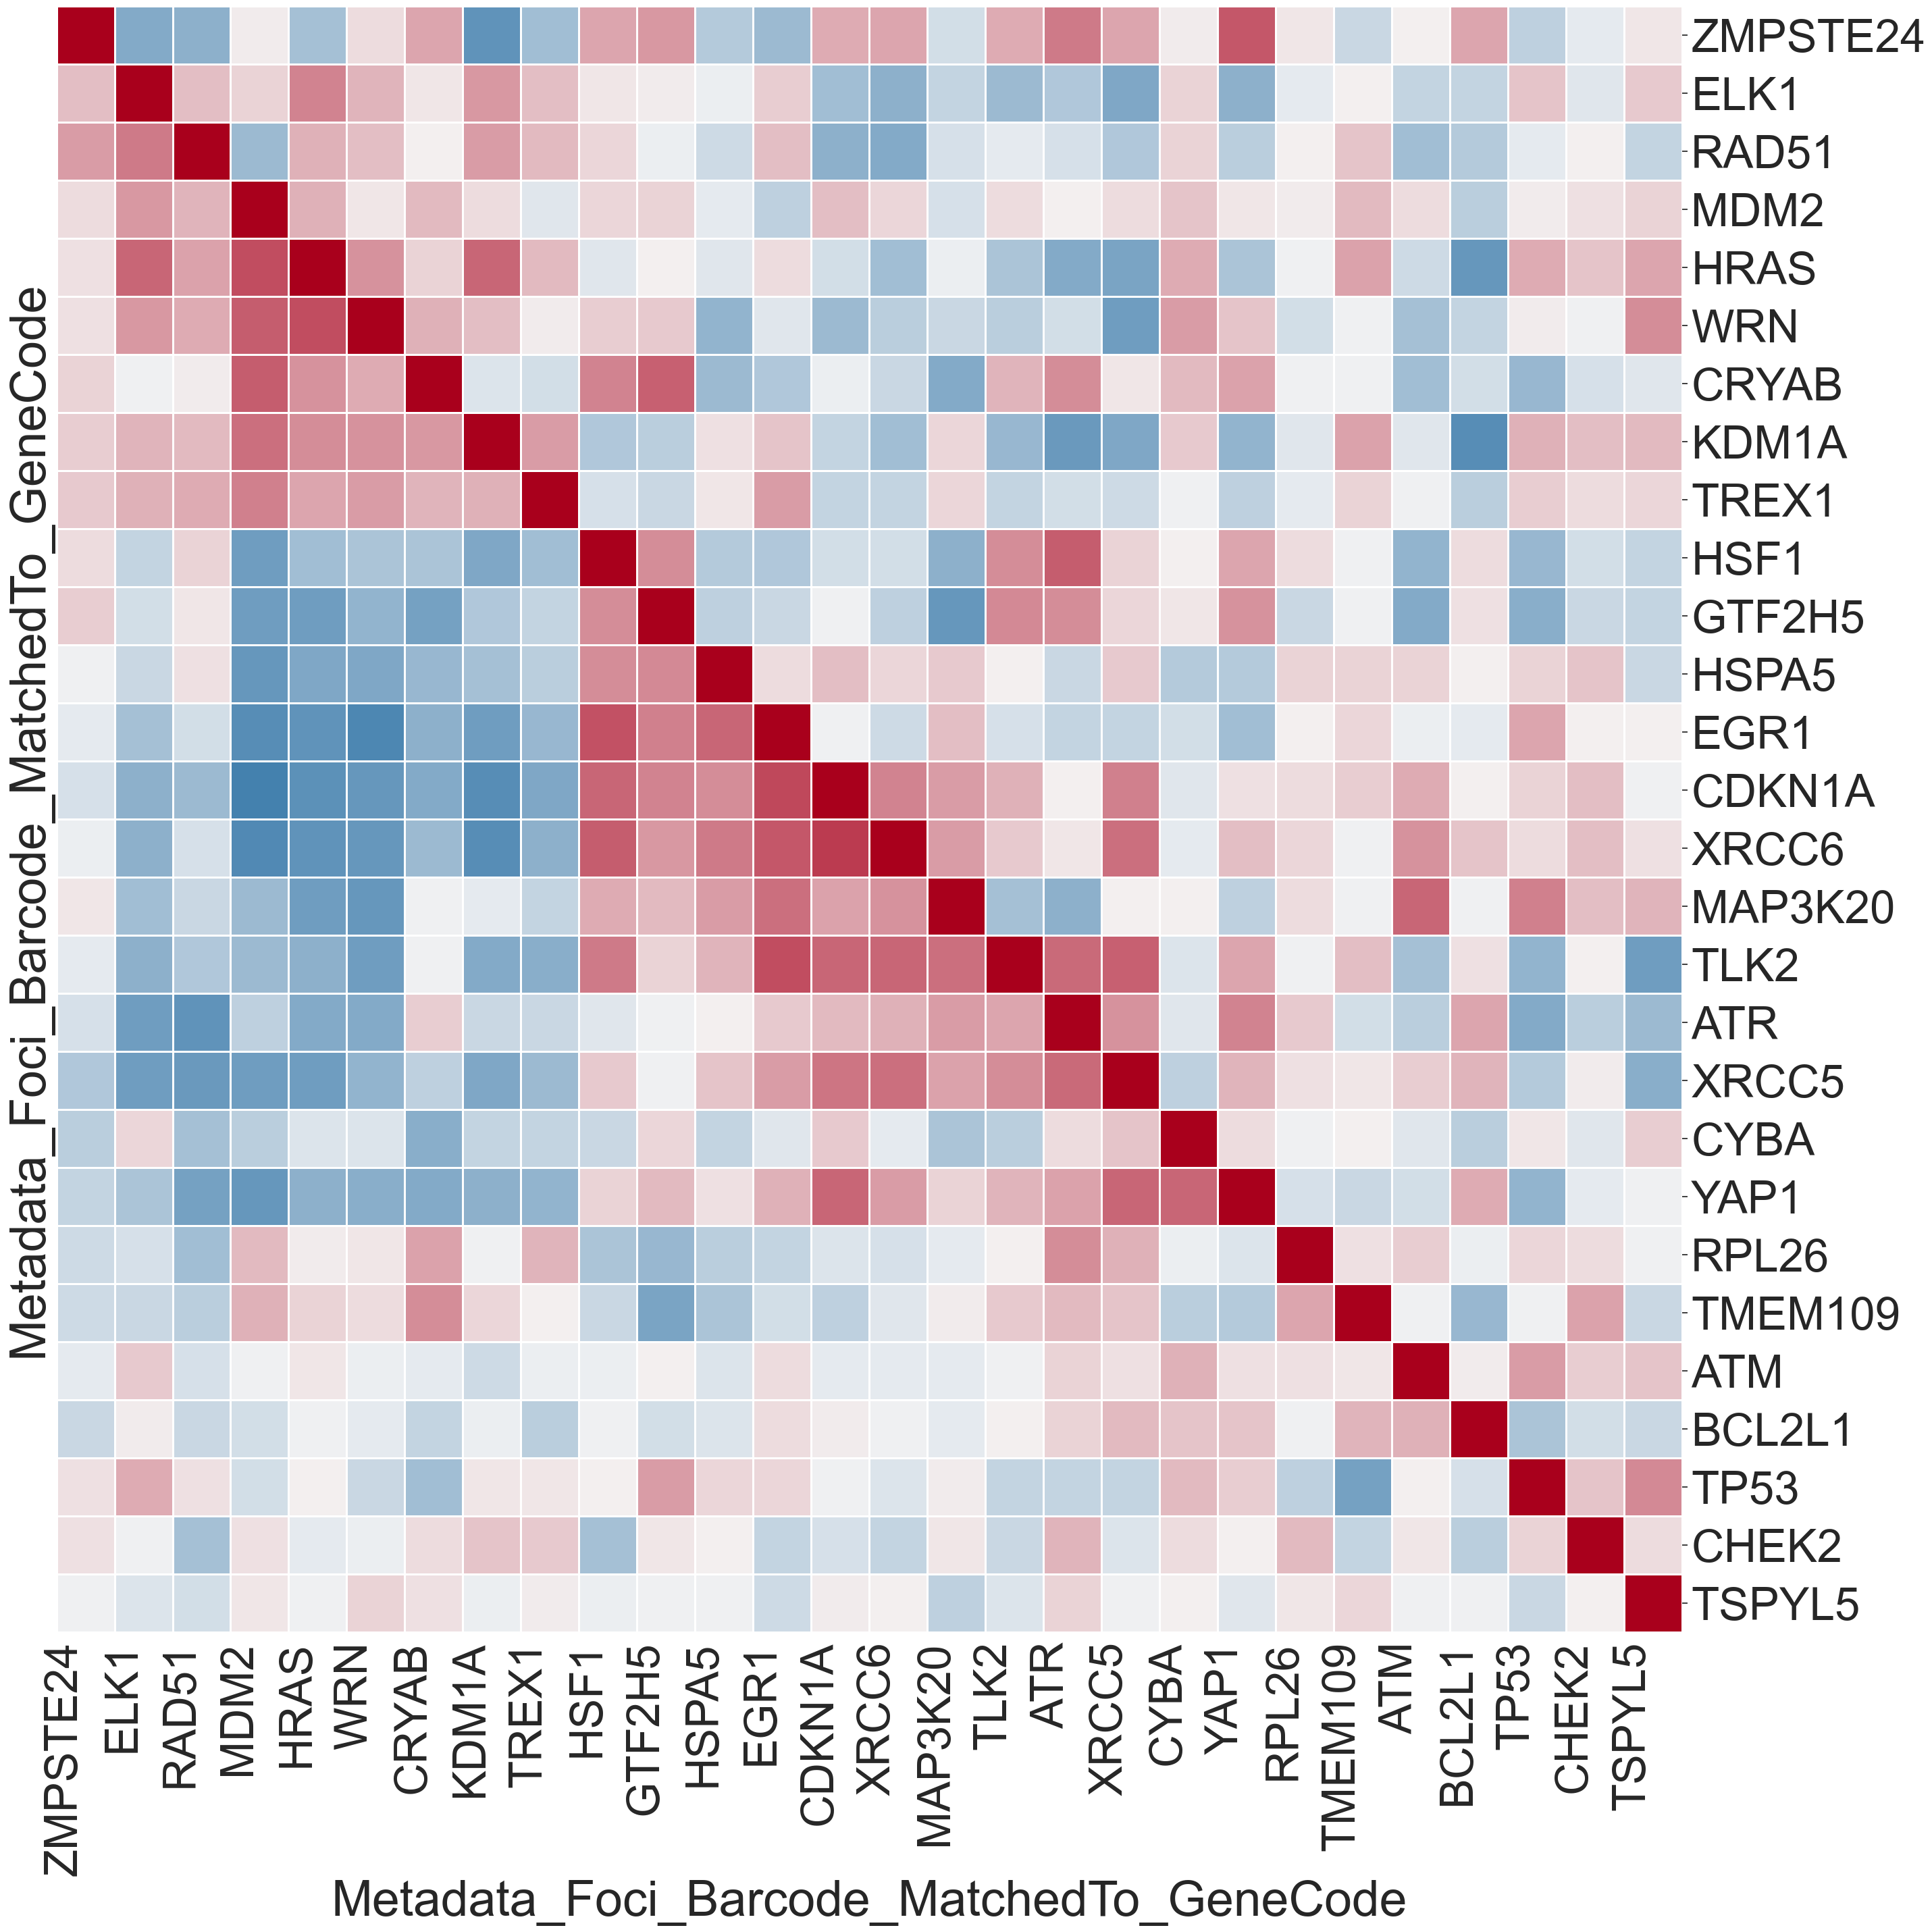

In [21]:
# Clustered based on the HPLM arm first
gene_set = 'GOBP_CELLULAR_RESPONSE_TO_GAMMA_RADIATION_HPLM_cluster'
genes = 'CDKN1A	ZMPSTE24	YAP1	TLK2	CHEK2	TREX1	CRYAB	CYBA	EGR1	ELK1	KDM1A	XRCC6	H2AX	HRAS	HSF1	HSPA5	GTF2H5	MIR21	MDM2	ATM	MAP3K20	ATR	RAD51	BCL2L1	RPL26	TP53	WRN	XRCC5	TMEM109	TSPYL5'
coupled_heatmap(HeLa_HPLM_df,df_gene_DMEM,gene_set,genes,4.4)


<Figure size 1000x1000 with 0 Axes>

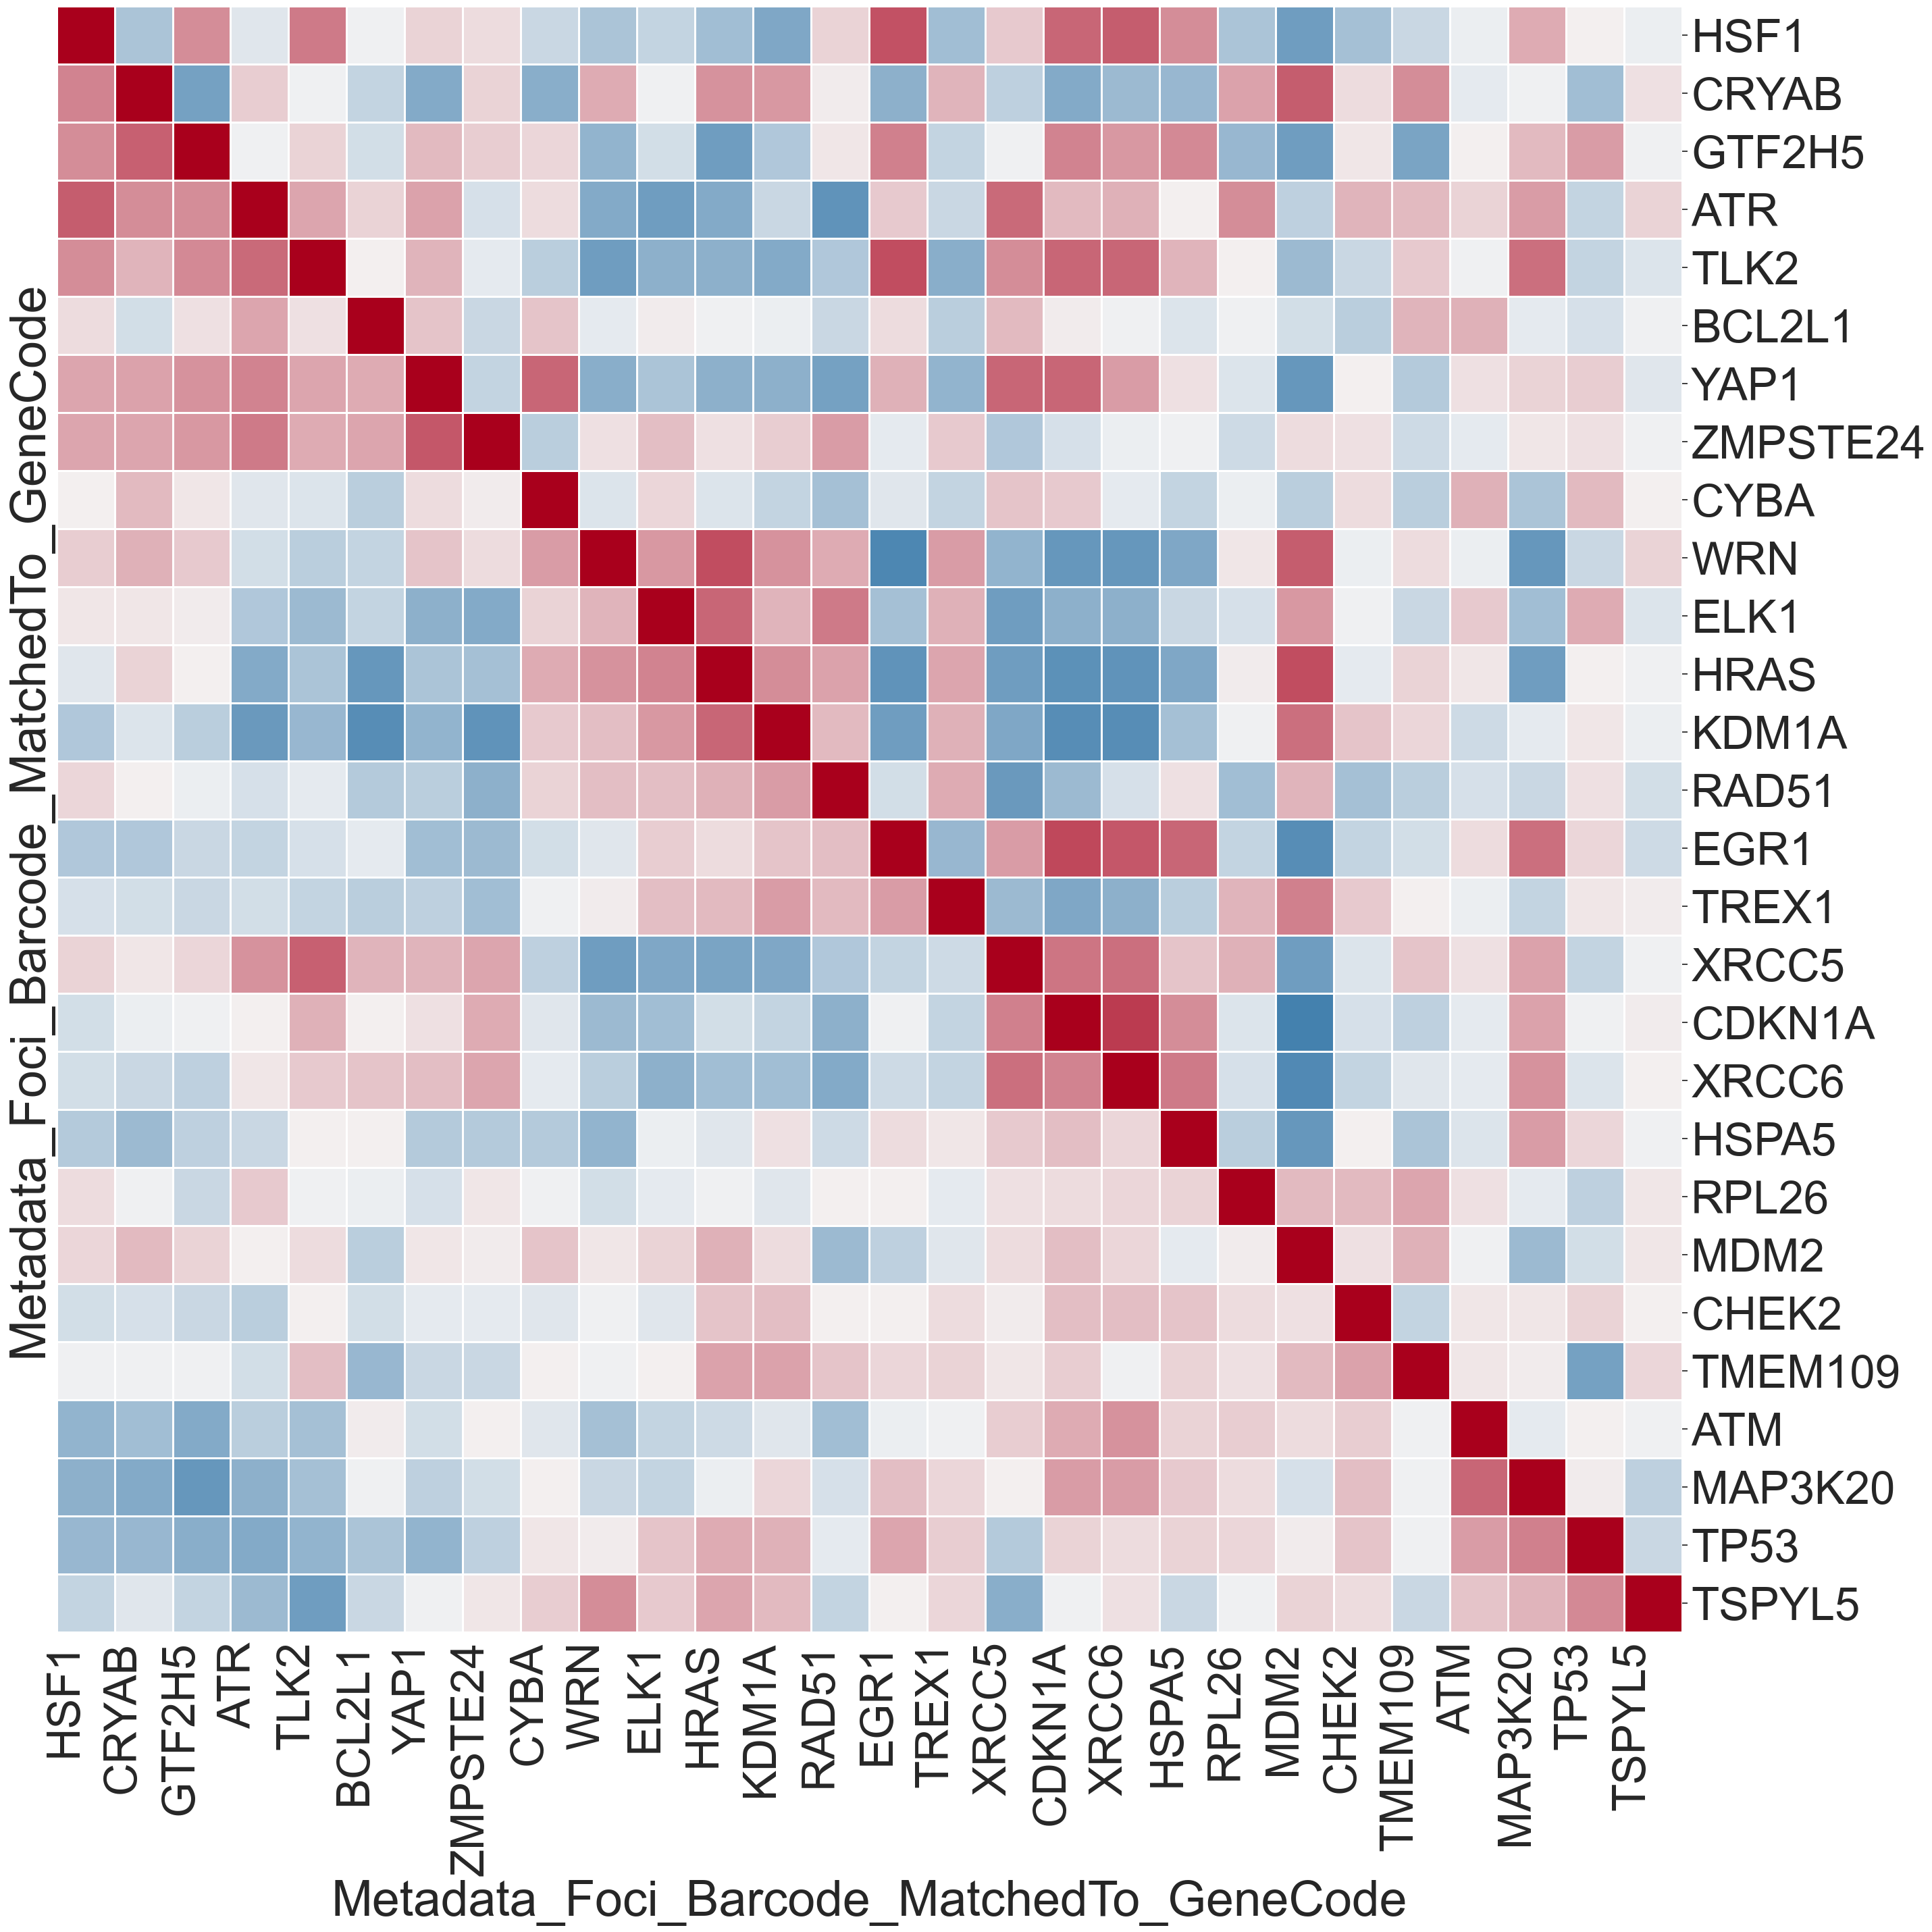

In [22]:
# Clustered based on the DMEM arm first
gene_set = 'GOBP_CELLULAR_RESPONSE_TO_GAMMA_RADIATION_DMEM_cluster'
genes = 'CDKN1A	ZMPSTE24	YAP1	TLK2	CHEK2	TREX1	CRYAB	CYBA	EGR1	ELK1	KDM1A	XRCC6	H2AX	HRAS	HSF1	HSPA5	GTF2H5	MIR21	MDM2	ATM	MAP3K20	ATR	RAD51	BCL2L1	RPL26	TP53	WRN	XRCC5	TMEM109	TSPYL5'
coupled_heatmap(df_gene_DMEM,HeLa_HPLM_df,gene_set,genes,4.4)
